In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline
%pylab
%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Parte I: Exploración, limpieza, selección de variables, entre otros.

En esta sección se realiza la preparación de los datos. Limpieza del dataframe por valores nulos, renombrado de variables, cálculo de nuevas variables, descarte de variables que no forman parte de análisis, entre otros.

## Analisis exploratorio

In [2]:
data = pd.read_csv('../Nuevas_variables/v5/input_extendidov5.csv')
data.head(10)

,Unnamed: 0,Date,Year,Season,local_team,visitor_team,Points,Opponent_Points,Result,LOCAL_Racha,...,local_played_visitor,visitor_played_visitor,visitor_played_local,place_local_played,place_visitor_played,avg_distance_place_visitor_played,avg_distance_place_local_played,distance_between_stadiums,distance_local_traveled,distance_visitor_traveled
0,0,Oct 30,2015,2016,Philadelphia 76ers,Utah Jazz,71,99,1,-1,...,1,1,0,Boston Celtics,Detroit Pistons,313.5,822.000000,2964.0,1644.0,627.0
1,1,Nov 2,2015,2016,Philadelphia 76ers,Cleveland Cavaliers,100,107,1,-2,...,0,0,1,Philadelphia 76ers,Cleveland Cavaliers,488.0,0.000000,1464.0,0.0,1464.0
2,2,Nov 7,2015,2016,Philadelphia 76ers,Orlando Magic,97,105,1,-5,...,1,0,1,Cleveland Cavaliers,Orlando Magic,1806.0,1464.000000,1806.0,1464.0,1806.0
3,3,Nov 9,2015,2016,Philadelphia 76ers,Chicago Bulls,88,111,1,-6,...,0,0,1,Philadelphia 76ers,Chicago Bulls,501.0,0.000000,1002.0,0.0,1002.0
4,4,Nov 11,2015,2016,Philadelphia 76ers,Toronto Raptors,103,119,1,-7,...,0,0,1,Philadelphia 76ers,Toronto Raptors,301.0,0.000000,301.0,0.0,301.0
5,5,Nov 16,2015,2016,Philadelphia 76ers,Dallas Mavericks,86,92,1,-10,...,1,1,0,San Antonio Spurs,Houston Rockets,285.0,3841.000000,314.0,7682.0,570.0
6,6,Nov 18,2015,2016,Philadelphia 76ers,Indiana Pacers,85,112,1,-11,...,0,1,0,Philadelphia 76ers,Chicago Bulls,501.0,0.000000,990.0,0.0,1002.0
7,7,Dec 1,2015,2016,Philadelphia 76ers,Los Angeles Lakers,103,91,0,-18,...,1,0,1,Memphis Grizzlies,Los Angeles Lakers,2003.0,135.500000,4006.0,271.0,4006.0
8,8,Dec 5,2015,2016,Philadelphia 76ers,Denver Nuggets,105,108,1,-1,...,1,1,0,New York Knicks,Toronto Raptors,150.5,135.666667,1349.0,407.0,301.0
9,9,Dec 7,2015,2016,Philadelphia 76ers,San Antonio Spurs,68,119,1,-2,...,0,0,1,Philadelphia 76ers,San Antonio Spurs,3841.0,0.000000,7682.0,0.0,7682.0


In [3]:
print("Totalidad de datos del .csv: " + str(len(data)))
data = data.dropna()
print("Totalidad de datos post drop NAN: " + str(len(data)))
print("Total de variables: "+ str(len(data.columns)))

Totalidad de datos del .csv: 6220
Totalidad de datos post drop NAN: 5891
Total de variables: 116


In [4]:
for column in data.columns:
    print(column)

Unnamed: 0
Date
Year
Season
local_team
visitor_team
Points
Opponent_Points
Result
LOCAL_Racha
ID Partido
LOCAL_Ultimos10Victorias
LOCAL_Ultimos10Derrotas
VISITANTE_Ultimos10Victorias
VISITANTE_Ultimos10Derrotas
VISITANTE_Racha
local_Conf_position
local_Win
local_Lose
local_Percentagewl
local_Dif_leader
local_Home_win
local_Home_lose
local_Away_win
local_Away_lose
local_Div_win
local_Div_lose
local_Cnf_win
local_Cnf_lose
local_Icf_win
local_Icf_lose
visitor_Conf_position
visitor_Win
visitor_Lose
visitor_Percentagewl
visitor_Dif_leader
visitor_Home_win
visitor_Home_lose
visitor_Away_win
visitor_Away_lose
visitor_Div_win
visitor_Div_lose
visitor_Cnf_win
visitor_Cnf_lose
visitor_Icf_win
visitor_Icf_lose
local_fg
local_fga
local_fg3
local_fg3a
local_ft
local_fta
local_orb
local_drb
local_trb
local_ast
local_stl
local_blk
local_tov
local_pf
local_pts
local_ft_pct
local_fg_pct
local_fg3_pct
visitor_fg
visitor_fga
visitor_fg3
visitor_fg3a
visitor_ft
visitor_fta
visitor_orb
visitor_drb
visitor_

## Calculo de variables compuestas

Indicar en el estudio la seleccion de variables por logica del modelo, y comentar aquellas observadas en estudios previos que no tienen ningun sentido incluir

Por ejemplo la ilogica inclusion de la diferencia_visitante_point observado en estudios previos

In [5]:
# VARIABLE MAL CALCULADA, ESPERA DE ARREGLO POR PARTE DE VICTOR
data["Result1"] = 1

data["Result1"] = np.where(data["Opponent_Points"] > data["Points"], 0, 1)

data.rename(columns={'Result1': 'target'}, inplace=True)

In [6]:


data['local_visitor_dif_pts'] = data['local_pts'] - data['visitor_pts']

data['LOCAL_porcentaje_victoria_Ultimos10'] = (data['LOCAL_Ultimos10Victorias']) / (data['LOCAL_Ultimos10Victorias'] + data['LOCAL_Ultimos10Derrotas'])
data['VISITANTE_porcentaje_victoria_Ultimos10'] = (data['VISITANTE_Ultimos10Victorias']) / (data['VISITANTE_Ultimos10Victorias'] + data['VISITANTE_Ultimos10Derrotas'])


data['LOCAL_porcentaje_victoria_LOCAL'] = (data['local_Home_win']) / (data['local_Home_win'] + data['local_Home_lose'])
data['VISITANTE_porcentaje_victoria_VISITANTE'] = (data['visitor_Home_win']) / (data['visitor_Home_win'] + data['visitor_Home_lose'])


data = data.dropna()
len(data) 
print("Totalidad de datos post cálculo de varaibles compuestas: " + str(len(data)))

Totalidad de datos post cálculo de varaibles compuestas: 5809


## Transformacion de variables categoricas

Estrictamente necesario transformar las variables categoricas para modelar con las librerias de Python que estamos utilizando.

Distintos enfoques para trabajar variables categoricas: https://pbpython.com/categorical-encoding.html

Trabajar con variables categoricas en Machine Learning: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/


## ¿"Maldición de la dimensionalidad"?

¿Un posible problema por la escasez de datos y la alta dimensionalidad del modelo? Cerca de 100 variables previo a selección (pendiente de profundizar) 

https://en.wikipedia.org/wiki/Curse_of_dimensionality#Machine_learning

In [7]:
data = pd.get_dummies(data, columns=['Local_Conferencia', 'Local_Division'],
               prefix=['Conf_local', 'Div_local'])

data = pd.get_dummies(data, columns=['Visitor_Conferencia', 'Visitor_Division'],
               prefix=['Conf_visitor', 'Div_visitor'])

data.rename(columns={'Div_local_Atlantic Division':'Div_local_Atlantic',
                    'Div_local_Central Division': 'Div_local_Central',
                    'Div_local_Northwest Division': 'Div_local_Northwest',
                    'Div_local_Pacific Division': 'Div_local_Pacific',
                    'Div_local_Southeast Division': 'Div_local_Southeast',
                    'Div_local_Southwest Division': 'Div_local_Southwest'},inplace=True)

data.rename(columns={'Div_visitor_Atlantic Division':'Div_visitor_Atlantic',
                    'Div_visitor_Central Division': 'Div_visitor_Central',
                    'Div_visitor_Northwest Division': 'Div_visitor_Northwest',
                    'Div_visitor_Pacific Division': 'Div_visitor_Pacific',
                    'Div_visitor_Southeast Division': 'Div_visitor_Southeast',
                    'Div_visitor_Southwest Division': 'Div_visitor_Southwest'},inplace=True)

In [8]:
# Seleccion de variables para análisis de correlación

local = []
def filter_local_name(name):
    if 'Local' in name:
      return name
    if 'LOCAL' in name:
        return name
    if 'local' in name:
        return name
    
for variable in data.columns:
    if (filter_local_name(variable) != None):
        local.append(variable)
print(local)

['local_team', 'LOCAL_Racha', 'LOCAL_Ultimos10Victorias', 'LOCAL_Ultimos10Derrotas', 'local_Conf_position', 'local_Win', 'local_Lose', 'local_Percentagewl', 'local_Dif_leader', 'local_Home_win', 'local_Home_lose', 'local_Away_win', 'local_Away_lose', 'local_Div_win', 'local_Div_lose', 'local_Cnf_win', 'local_Cnf_lose', 'local_Icf_win', 'local_Icf_lose', 'local_fg', 'local_fga', 'local_fg3', 'local_fg3a', 'local_ft', 'local_fta', 'local_orb', 'local_drb', 'local_trb', 'local_ast', 'local_stl', 'local_blk', 'local_tov', 'local_pf', 'local_pts', 'local_ft_pct', 'local_fg_pct', 'local_fg3_pct', 'Sueldo local', 'LOCAL_AWS_MEDIO_AGRUPADO', 'local_dif_between_previous_game', 'local_played_previous_date', 'local_played_two_days_ago', 'local_played_three_days_ago', 'local_played_prorrogue_previous_date', 'local_played_prorrogue_two_days_ago', 'local_played_prorrogue_three_days_ago', 'local_played_local', 'local_played_visitor', 'visitor_played_local', 'place_local_played', 'avg_distance_place_l

## Seleccion de Variables por Matriz de Correlación

In [20]:
#Copiamos y pegamos el output del código anterior, incluyendo ahora "target"

game_var_local = ['target', 'local_visitor_dif_pts', 'local_orb', 'local_drb', 'local_trb', 'local_ast',
                  'local_stl', 'local_blk', 'local_tov','local_pf',
                  'local_ft_pct', 'local_fg_pct', 'local_fg3_pct']

game_var_visitante = ['target', 'local_visitor_dif_pts', 'visitor_orb', 'visitor_drb',
                      'visitor_trb', 'visitor_ast','visitor_stl', 'visitor_blk', 'visitor_tov','visitor_pf',
                      'visitor_ft_pct', 'visitor_fg_pct', 'visitor_fg3_pct']


prev_var_local = ['target', 'LOCAL_Racha','LOCAL_porcentaje_victoria_Ultimos10', 'local_Percentagewl',
                  'LOCAL_porcentaje_victoria_LOCAL','local_Conf_position','local_Dif_leader','Sueldo local',
                  
                  'local_dif_between_previous_game', 'local_played_local', 
                  'local_played_visitor', 'avg_distance_place_local_played',
                  'distance_between_stadiums', 'distance_local_traveled', 'LOCAL_AWS_MEDIO_AGRUPADO']


prev_var_visitante = ['target', 'VISITANTE_Racha','VISITANTE_porcentaje_victoria_Ultimos10','visitor_Percentagewl',
                      'VISITANTE_porcentaje_victoria_VISITANTE','visitor_Conf_position',
                      'visitor_Dif_leader','Sueldo visitante',
                      
                      'visitor_dif_between_previous_game', 'visitor_played_local', 
                      'visitor_played_visitor', 'avg_distance_place_visitor_played',
                      'distance_between_stadiums', 'distance_visitor_traveled', 'VISITOR_AWS_MEDIO_AGRUPADO']


dummy = ['local_played_previous_date','local_played_two_days_ago','local_played_three_days_ago',
         'local_played_prorrogue_previous_date','local_played_prorrogue_two_days_ago',
         'local_played_prorrogue_three_days_ago','Conf_local_Este','Div_local_Atlantic','Div_local_Central',
         'Div_local_Northwest', 'Div_local_Pacific','Div_local_Southeast', 'Div_local_Southwest',
         
         'visitor_played_previous_date','visitor_played_two_days_ago','visitor_played_three_days_ago',
         'visitor_played_prorrogue_previous_date','visitor_played_prorrogue_two_days_ago',
         'visitor_played_prorrogue_three_days_ago', 'Conf_visitor_Este','Div_visitor_Atlantic','Div_visitor_Central',
         'Div_visitor_Northwest','Div_visitor_Pacific','Div_visitor_Southeast', 'Div_visitor_Southwest']



prev_data_local = data[prev_var_local]
prev_data_visitante = data[prev_var_visitante]

game_data_local = data[game_var_local]
game_data_visitante = data[game_var_visitante]

var_continuas = game_var_local + game_var_visitante + prev_var_local + prev_var_visitante

all_variables = var_continuas + dummy

In [21]:
all_variables = list(dict.fromkeys(all_variables)) #drop duplicates
var_continuas = list(dict.fromkeys(var_continuas)) #drop duplicates
del all_variables[0] #borramos target de la primera posicion
del var_continuas[0] #borramos target de la primera posicion

all_variables.append('target') #insertamos target en la ultima posicion
var_continuas.append('target') #insertamos target en la ultima posicion

print('Total variables continuas:  '+ str(len(var_continuas)))
print('Total variables dummy:  '+ str(len(dummy)))

Total variables continuas:  51
Total variables dummy:  26


## “Garbage in, garbage out” (variables)

Hemos filtrado variables previo al análisis de selección, se sabe a priori que unas no aportan información importante para el modelo (derivan del proceso de extracción de datos, por ejemplo) y otras que si bien tienen mucha información asociada, se han descartado porque otras variables las sustituten. 

Se denota: (local/visitante) cuando se han filtrado las variables tanto de local como de visitante

**Unnamed: 0, Date, Year, Season, ID Partido, number_date**: estas se han eliminado porque derivan del proceso de extracción de datos.

##### Variables previas al partido:

**local_Home_win, local_Home_lose, local_Win, local_Lose, local_Away_win, local_Away_lose, local_Div_win, local_Div_lose, local_Cnf_win, local_Cnf_lose, local_Icf_win, local_Icf_lose** (local/visitante): todas estas variables contemplan la misma información desde distintas perspectivas, no tiene sentido incluirlas en el análisis, a contrario, su exclusión nos permitirá concentrarnos en la esencia de la lógica del modelo, predecir el resultado de la perspectiva del local.

**LOCAL_Ultimos10Victorias', 'LOCAL_Ultimos10Derrotas**



**local_team, visitor_team**:  son variables categóricas y no aportan información necesaria para que el algoritmo aprenda a determinar cuando gana un equipo u otro. El modelo será construido siempre desde la  perspectiva lógica de los datos, es decir, desde la visión del local (sea quien sea el equipo local o visitante).



##### Variables durante al partido: (FALTA AQUI ELIMINAR LAS DE JUEGO Y SUSTITUIR POR LAS COMPUESTAS)


**local_pts, visitor_pts, Points, Opponent_Points** (local/visitante) : las primeras variables si bien soy muy importantes (puntos de ambos equipos a mitad del juego), su información ya se encuentra resumida en la variable **'local_visitor_dif_pts'**. En muchas ocasiones es recomendable construir modelos con variables en su propia naturaleza, es decir, sin construir ratios, variables compuestas, entre otros. 

Sin embargo, el propósito en este caso es que el algoritmo contemple que a mayores diferencias de puntos entre el local y el visitante a mitad del juego, mayor probabilidad de que gane el partido el local (viceversa).

Las dos últimas corresponden con los puntos del local y el visitante (oponente) al final del partido. Estas variables contienen toda la información necesaria para determinar quien es el ganador del partido, en este contexto, no es posible entrenar un algoritmo con una información que no tendrá disponible al momento de utilizarlo en un caso real. Es por ello que estamos trabajando con información disponible hasta la mitad del juego.

**local_fg, local_fga, local_fg3, local_fg3a, local_ft, local_fta** (local/visitante): información contemplada como % de aciertos en las variables **local_ft_pct, local_fg_pct, local_fg3_pct**





#### Variables Dummy:

**place_local_played, place_visitor_played, local_played_visitor, visitor_played_local:** desde la perspectiva del modelo, ningúna tiene relevancia por lógica.

**'Conf_local_Oeste'** (local/visitante): por defecto tiene colinealidad perfecta con 'Conf_local_Este'

Text(0.5, 0.98, 'Distribución de Variables de equipo LOCAL Previos al Partido')

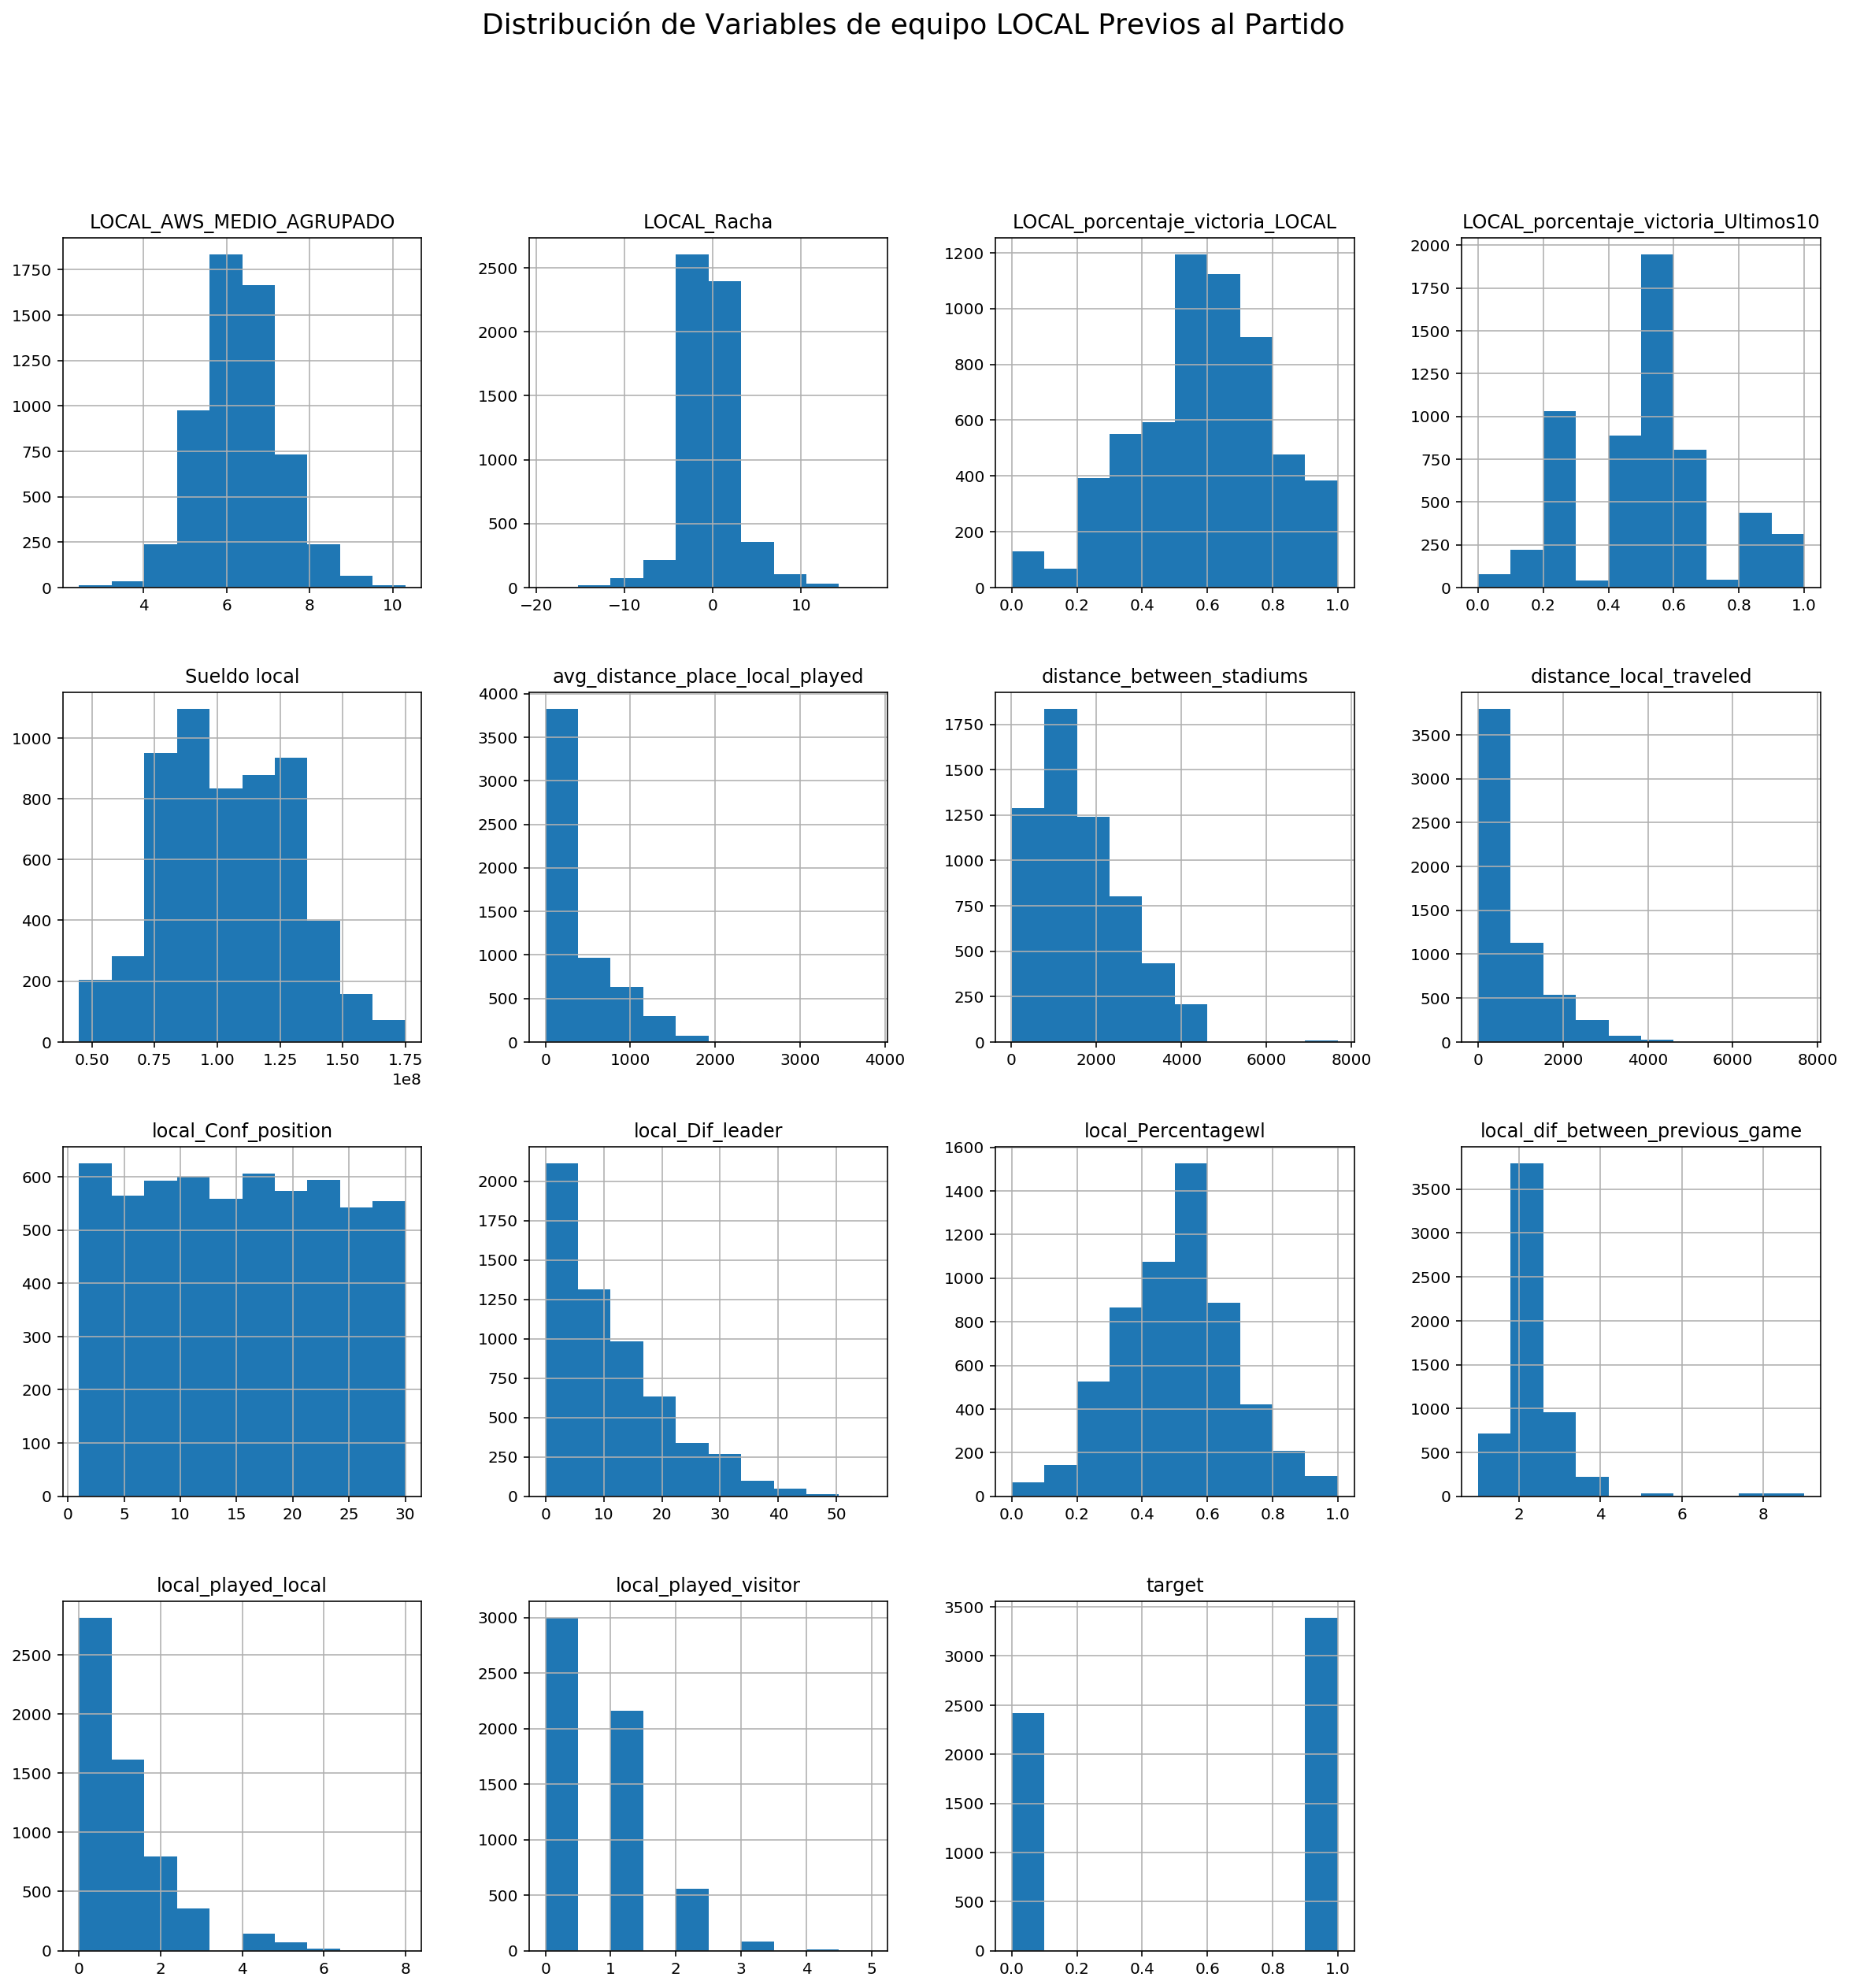

In [22]:
%matplotlib inline
prev_data_local.hist(figsize = (20, 20))
matplotlib.axes.Axes.remove
plt.suptitle('Distribución de Variables de equipo LOCAL Previos al Partido', fontsize = 18)

Text(0.5, 0.98, 'Distribución de Variables de equipo LOCAL a Mitad del Partido')

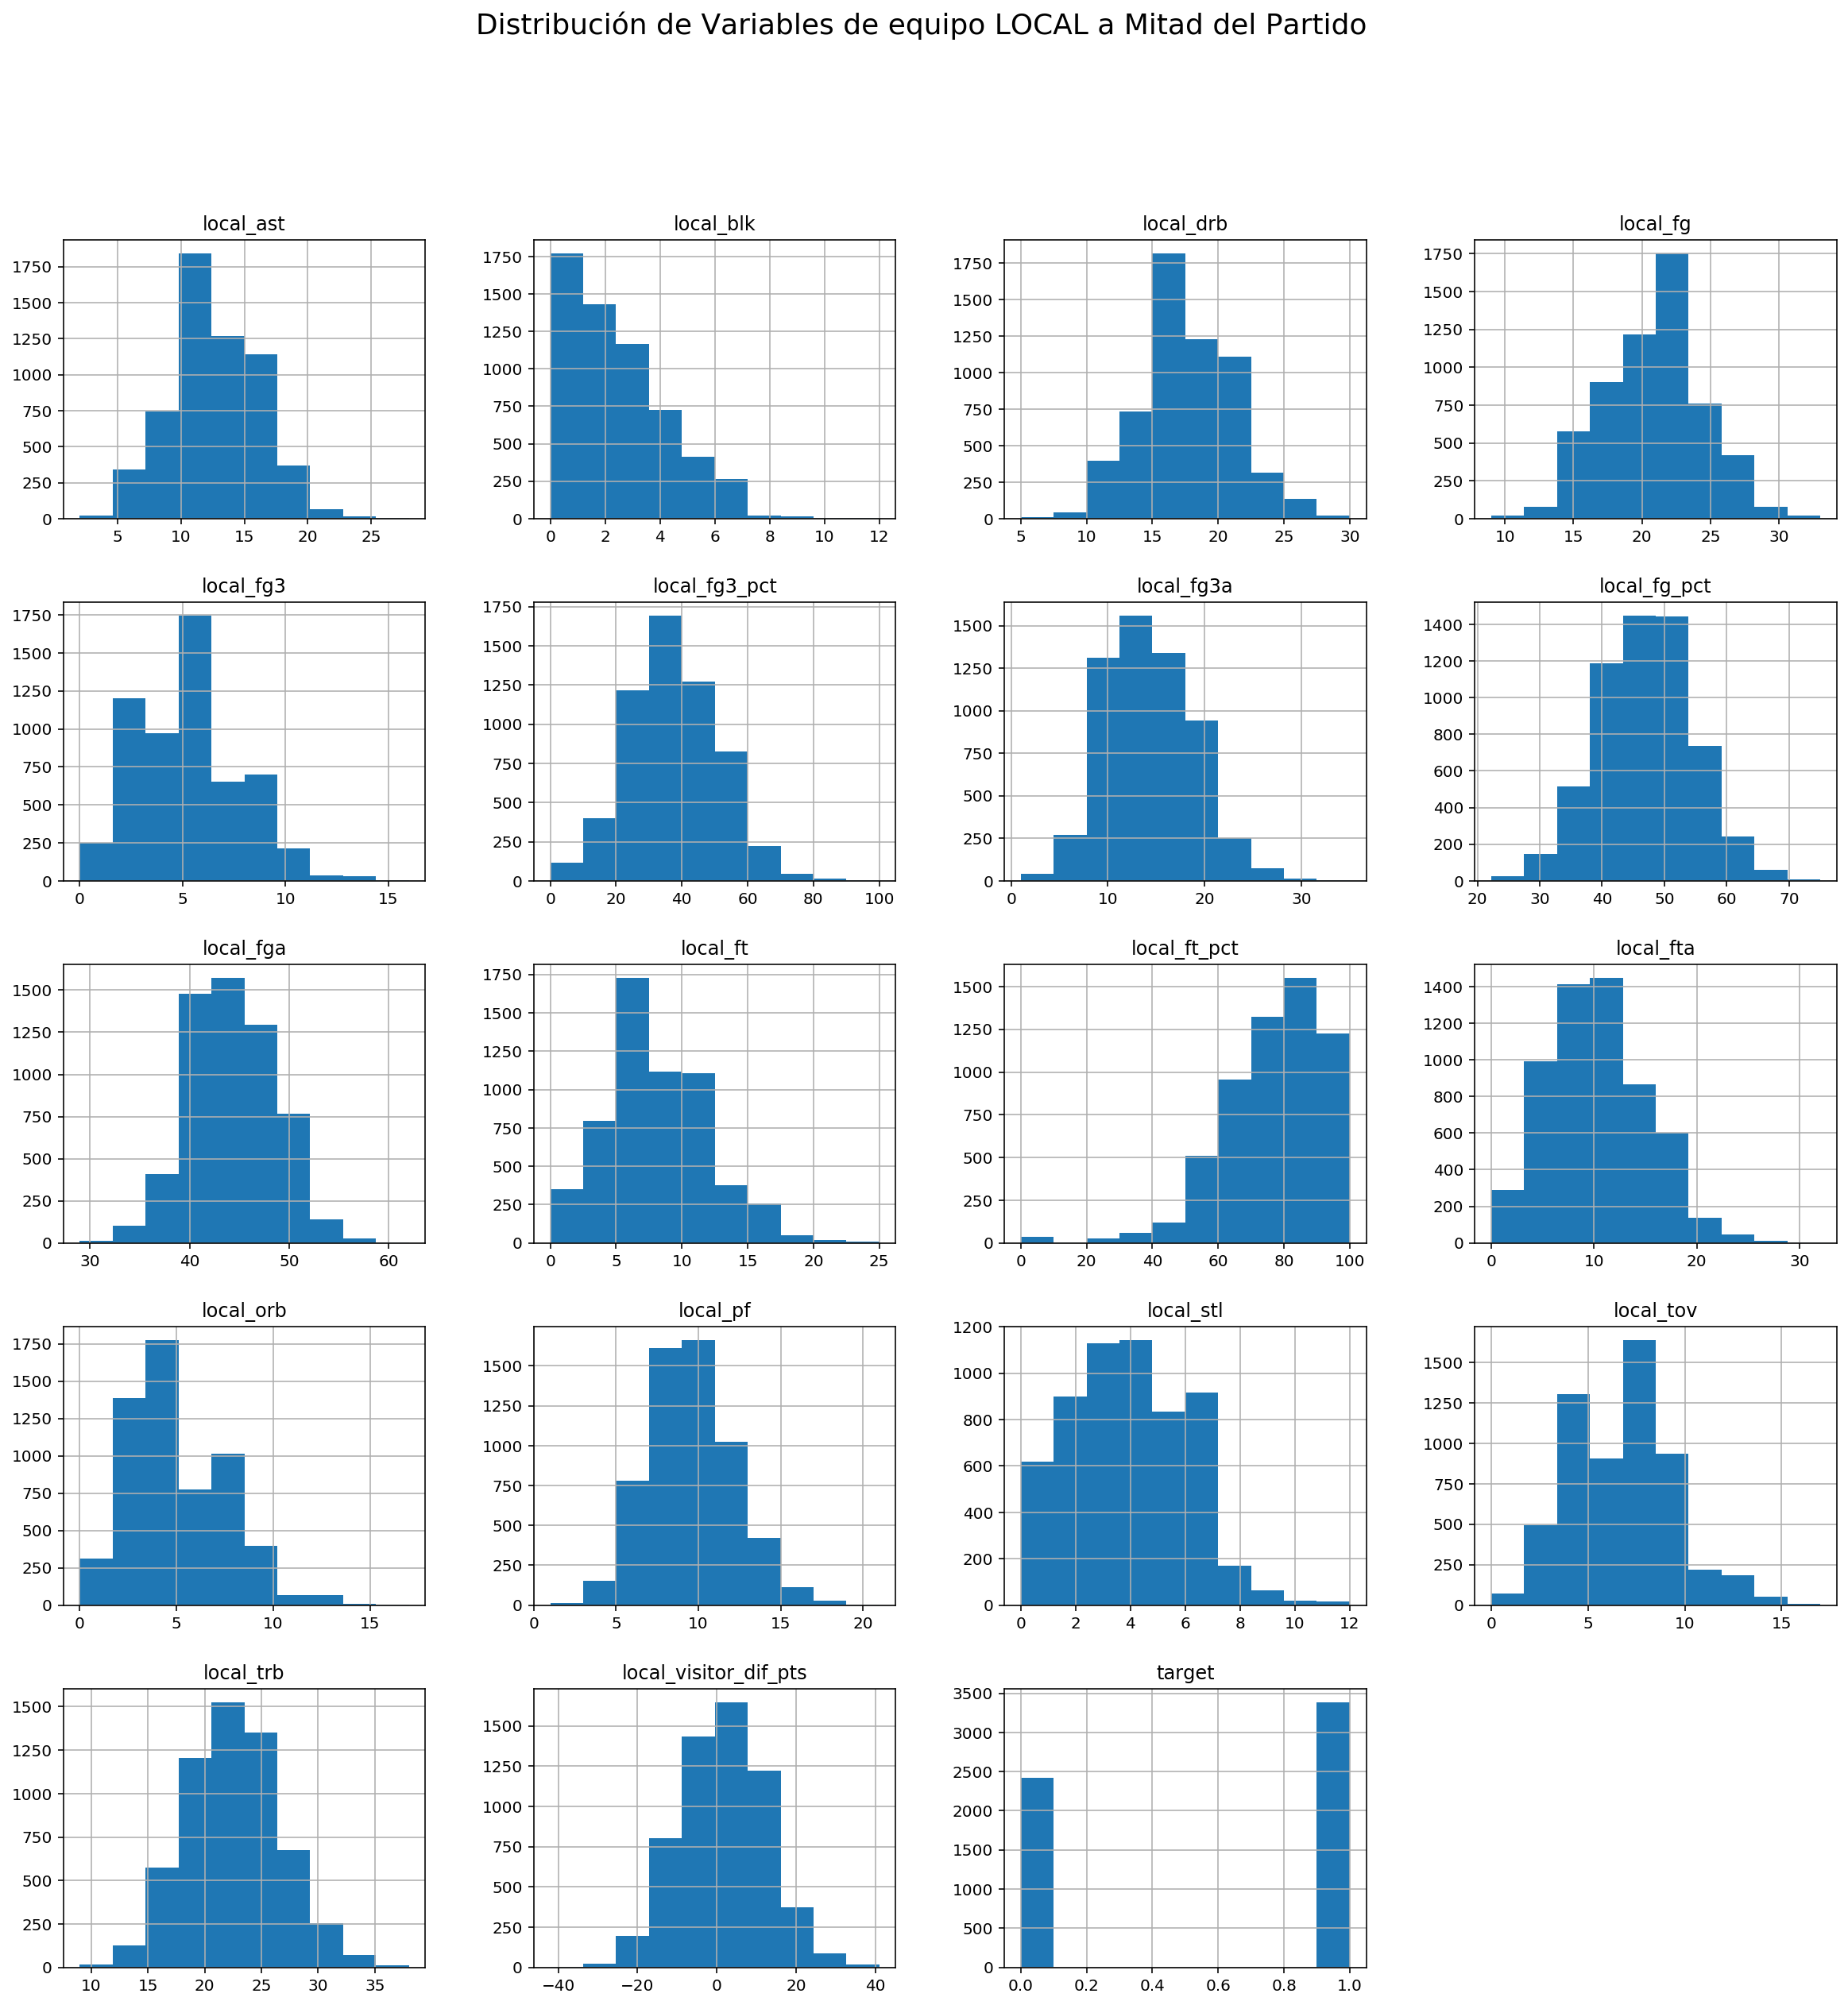

In [12]:
%matplotlib inline
game_data_local.hist(figsize = (20, 20))
matplotlib.axes.Axes.remove
plt.suptitle('Distribución de Variables de equipo LOCAL a Mitad del Partido', fontsize = 18)

Text(0.5, 1, 'Matriz de Correlación Previo al Partido LOCAL')

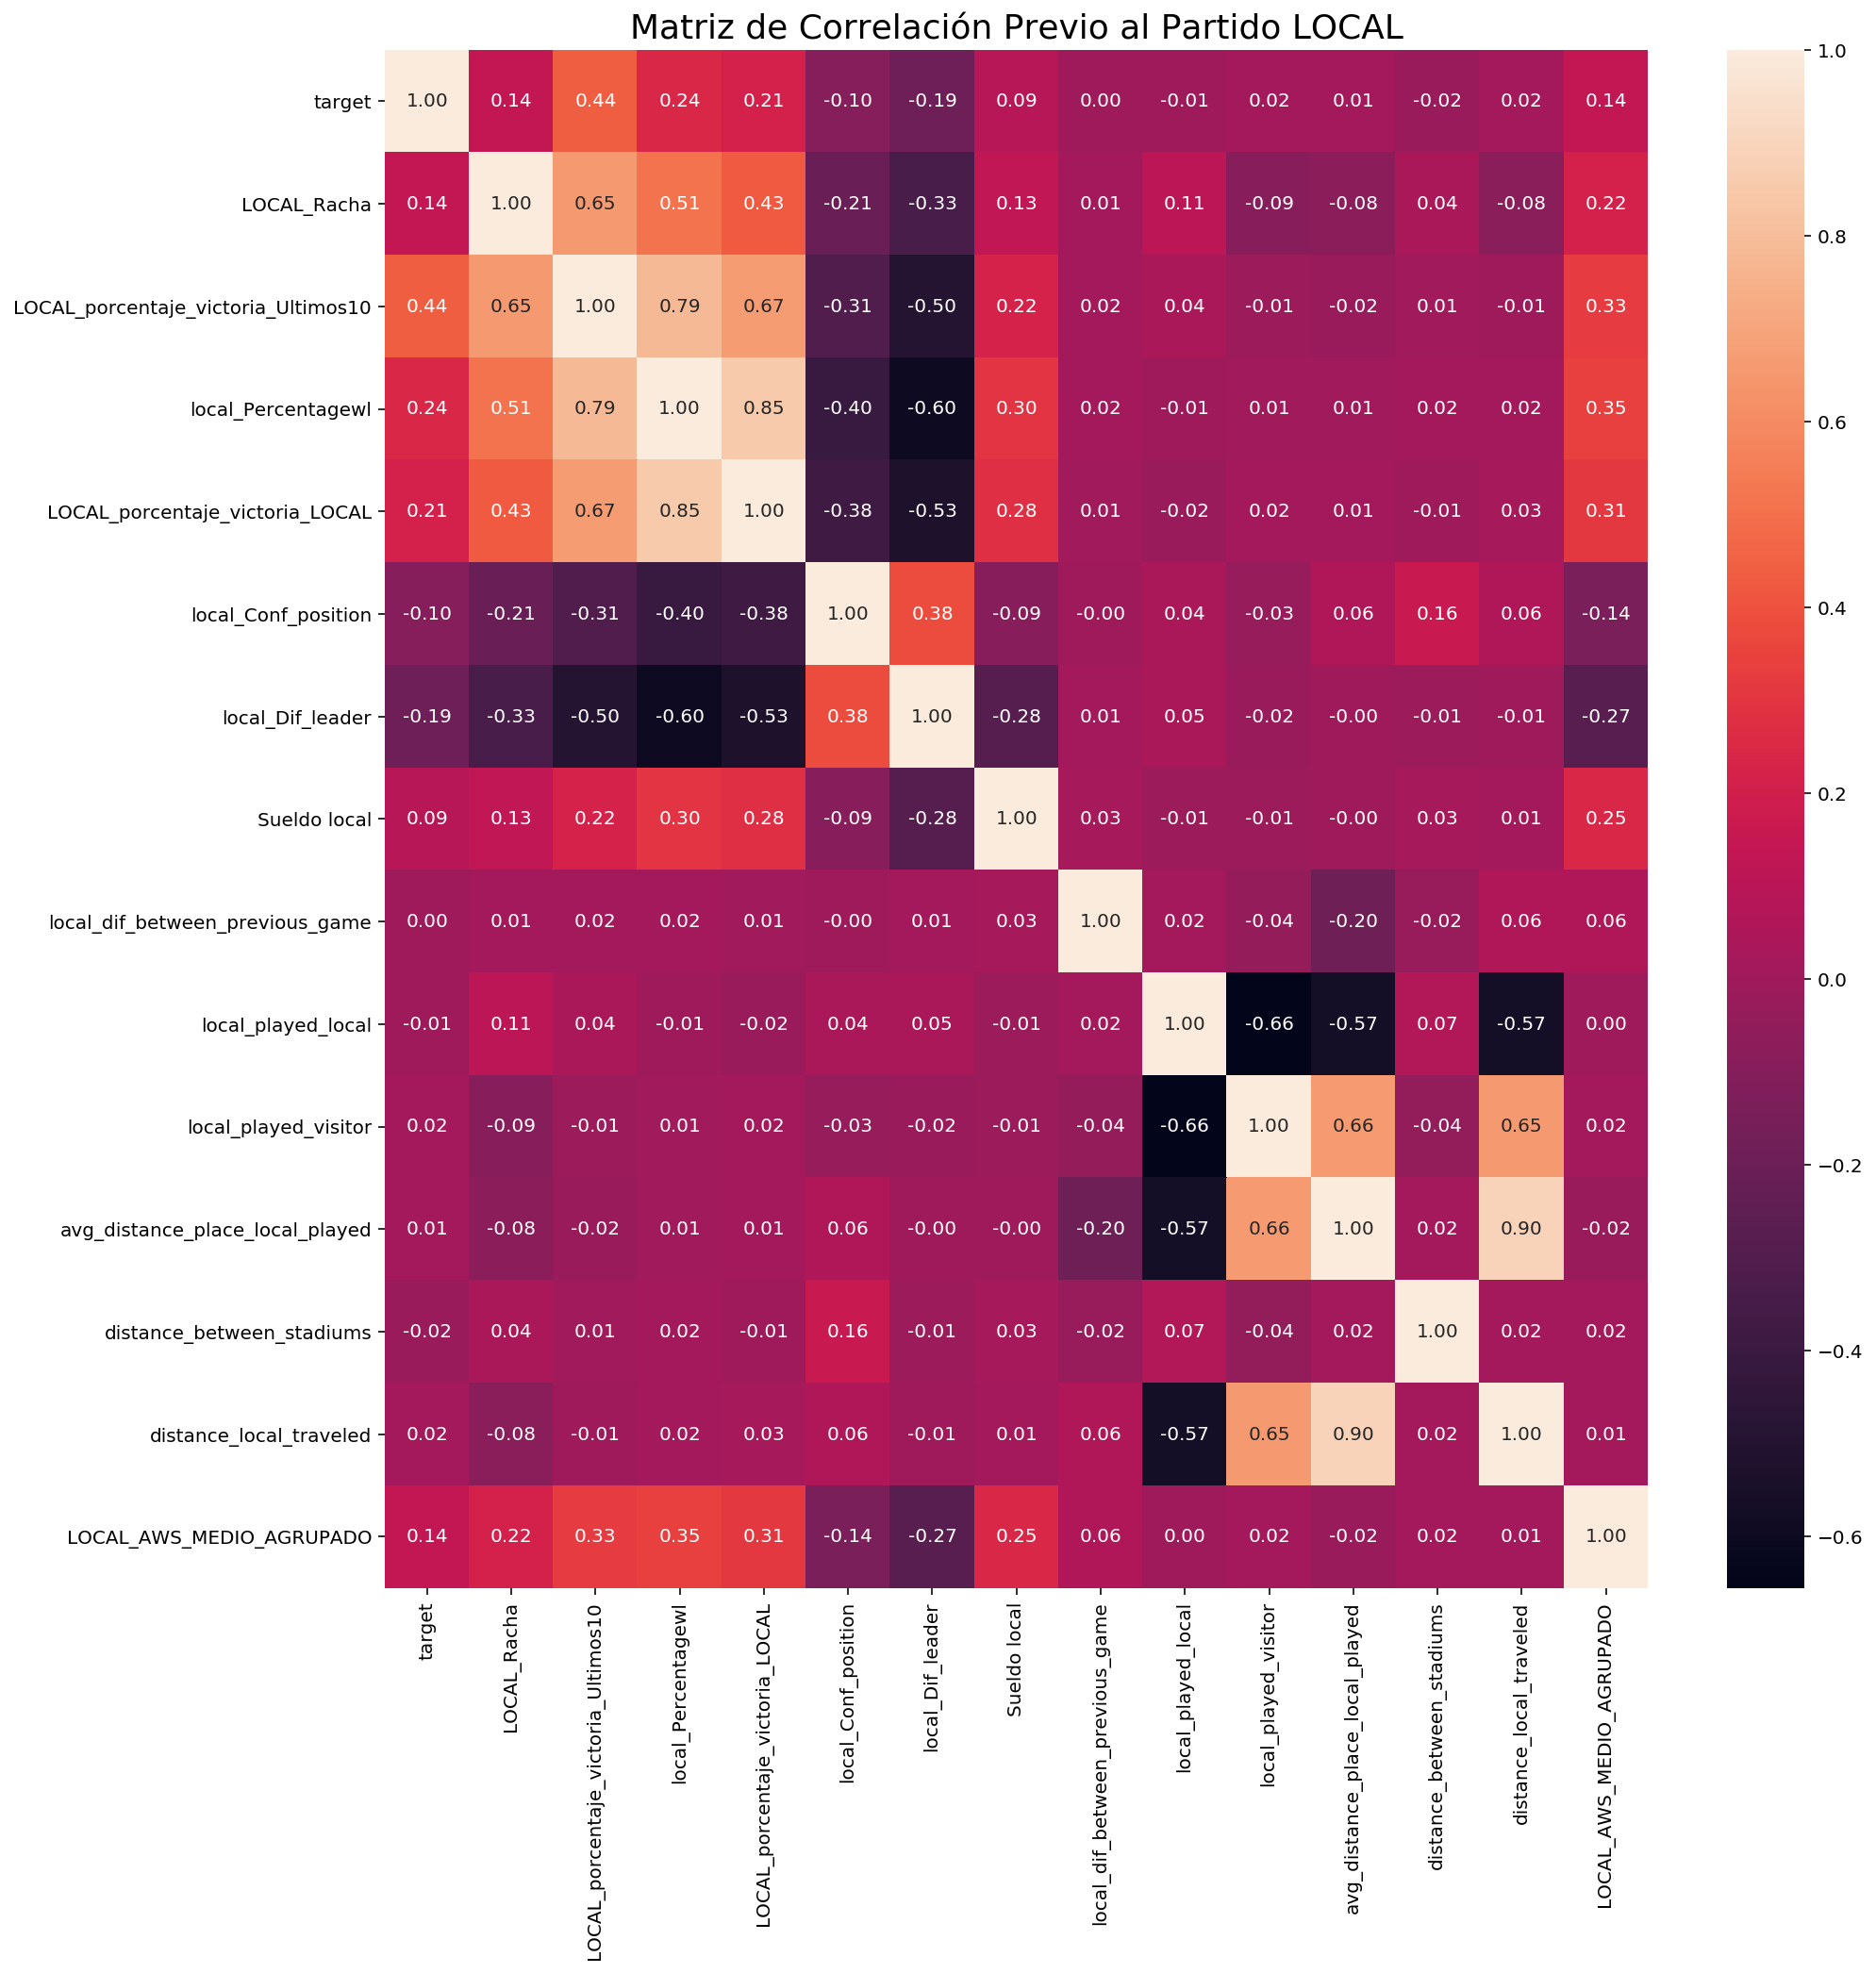

In [23]:
%matplotlib inline
# Heatmap PREV LOCAL
import seaborn as sns
plt.figure(figsize=(15, 15))
sns = sns.heatmap(prev_data_local.corr(), annot=True, fmt='.2f')
sns.set_title('Matriz de Correlación Previo al Partido LOCAL', fontsize=18)

Text(0.5, 1, 'Matriz de Correlación Previo al Partido VISITANTE')

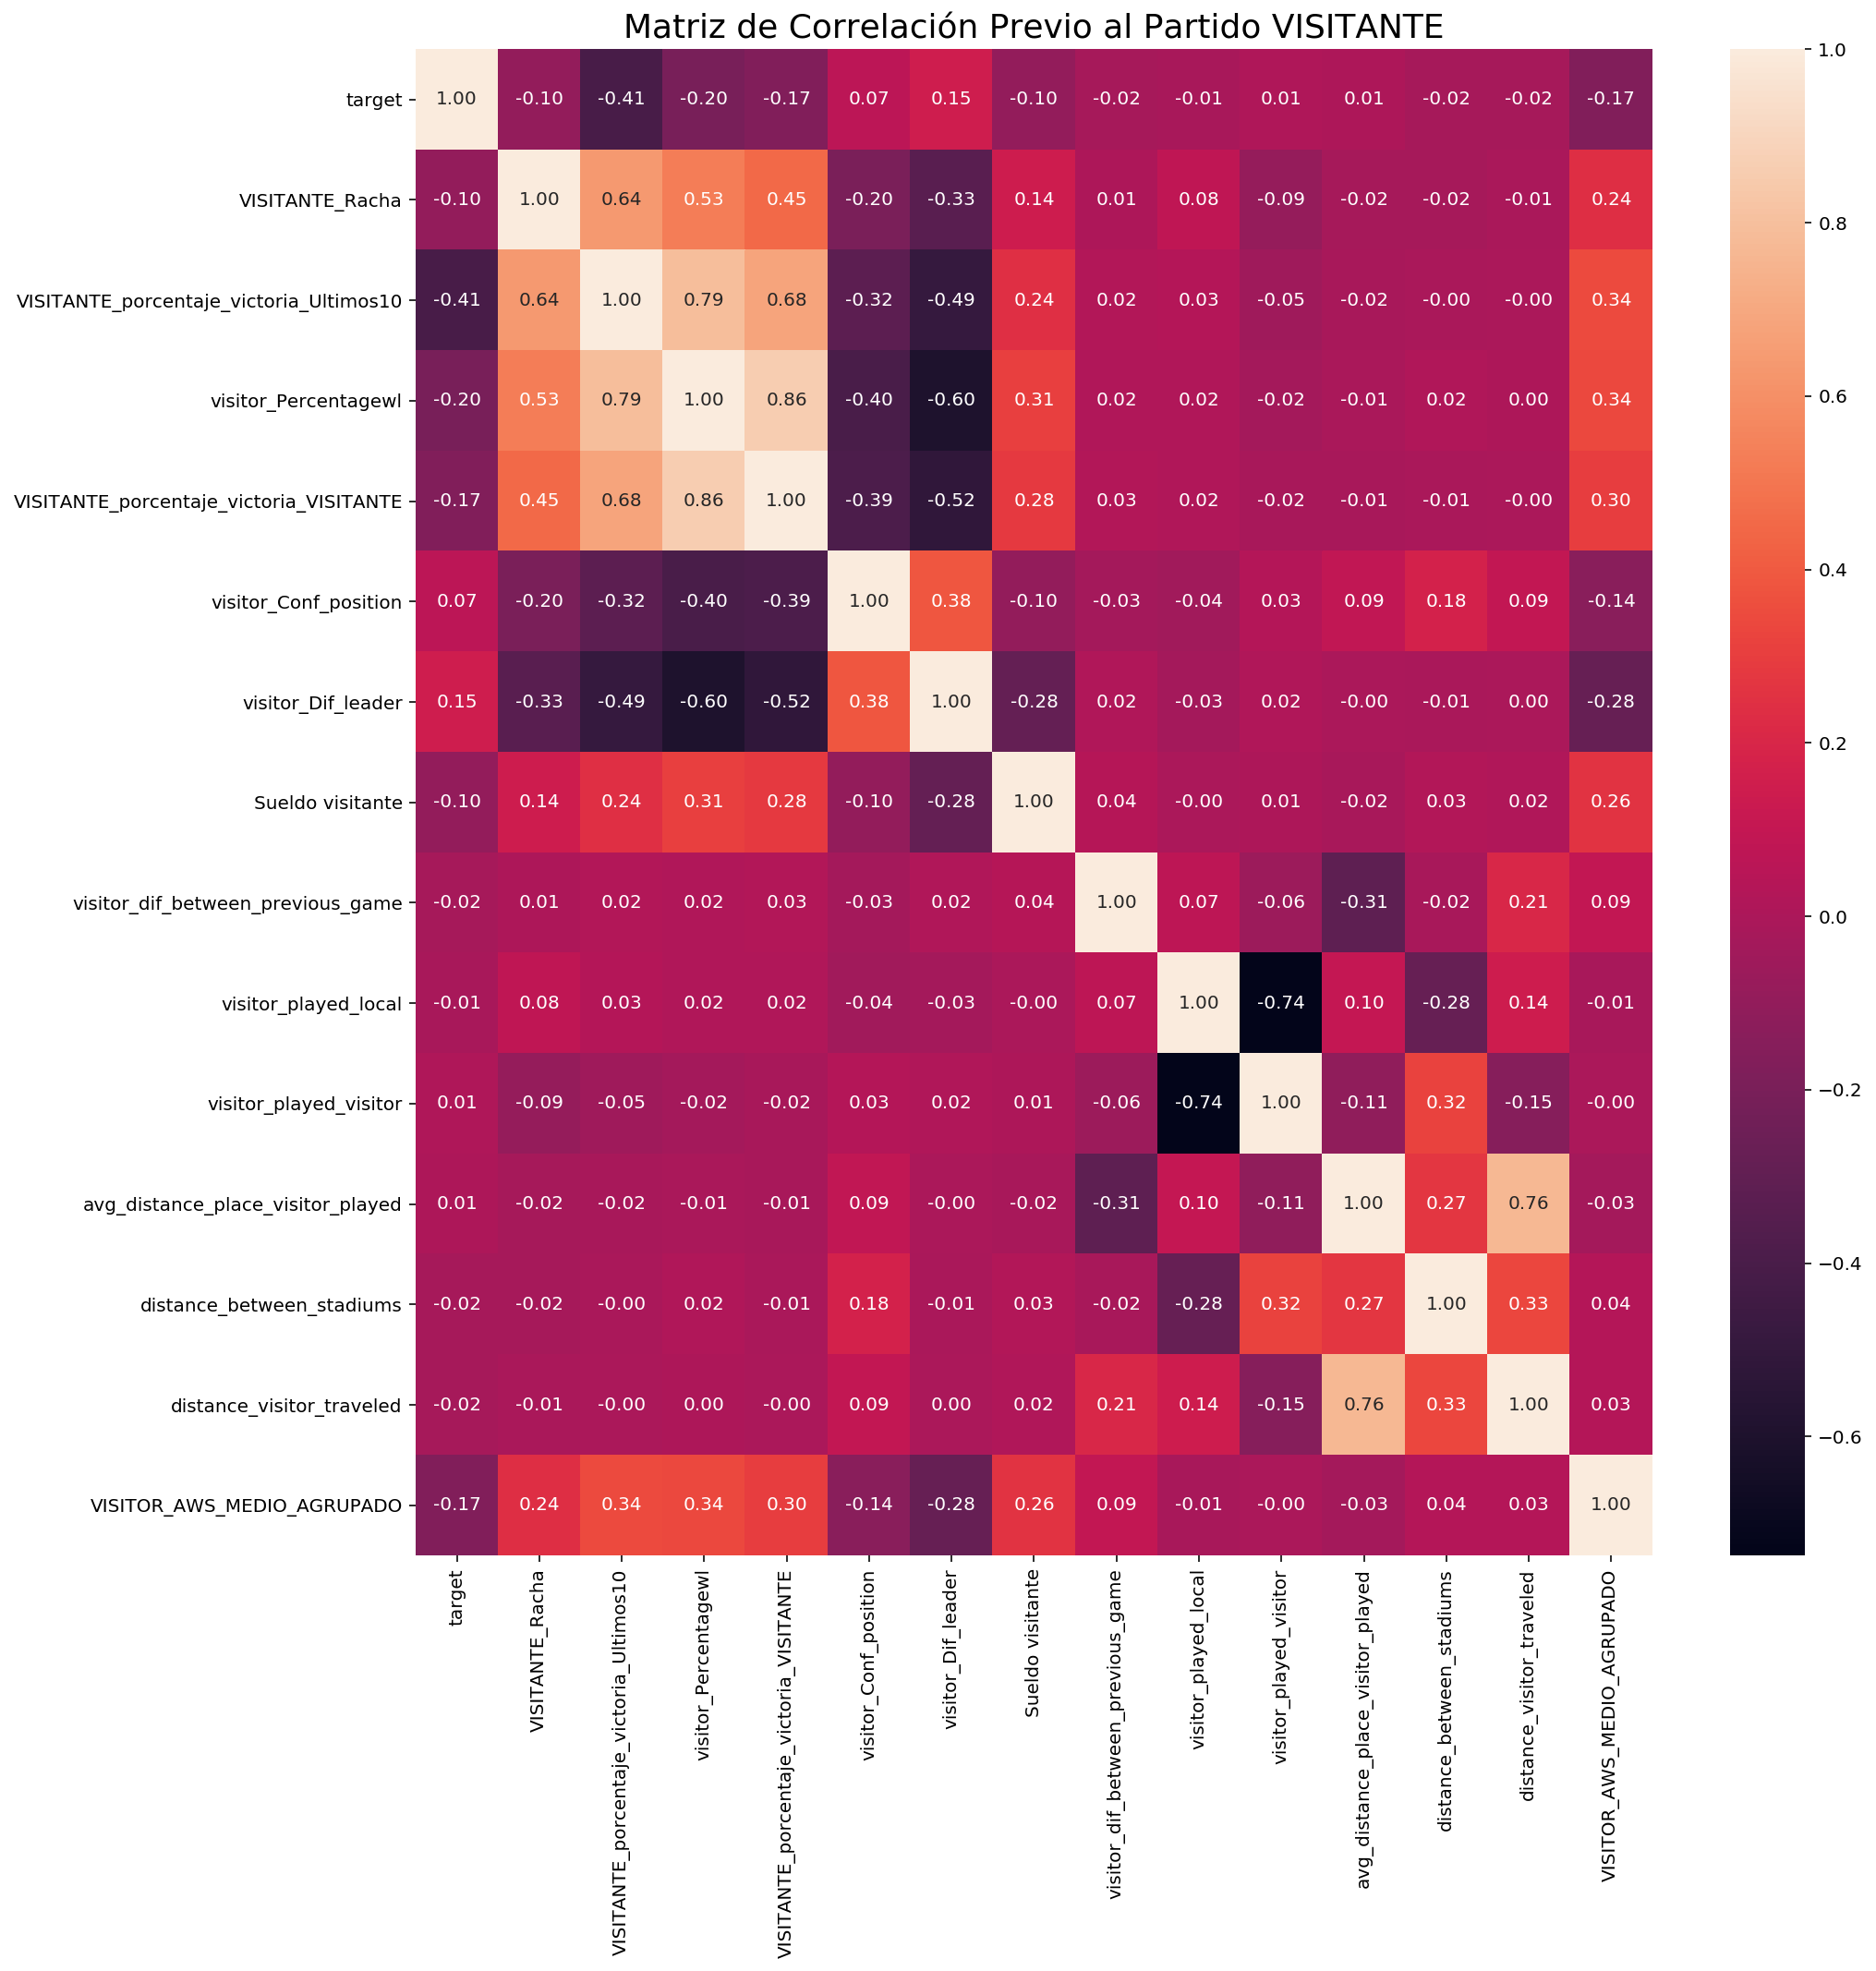

In [14]:
%matplotlib inline
# Heatmap PREV VISITANTE
import seaborn as sns
plt.figure(figsize=(15, 15))
sns_2 = sns.heatmap(prev_data_visitante.corr(), annot=True, fmt='.2f')
sns_2.set_title('Matriz de Correlación Previo al Partido VISITANTE', fontsize=18)

Text(0.5, 1, 'Matriz de Correlación Durante el Partido LOCAL')

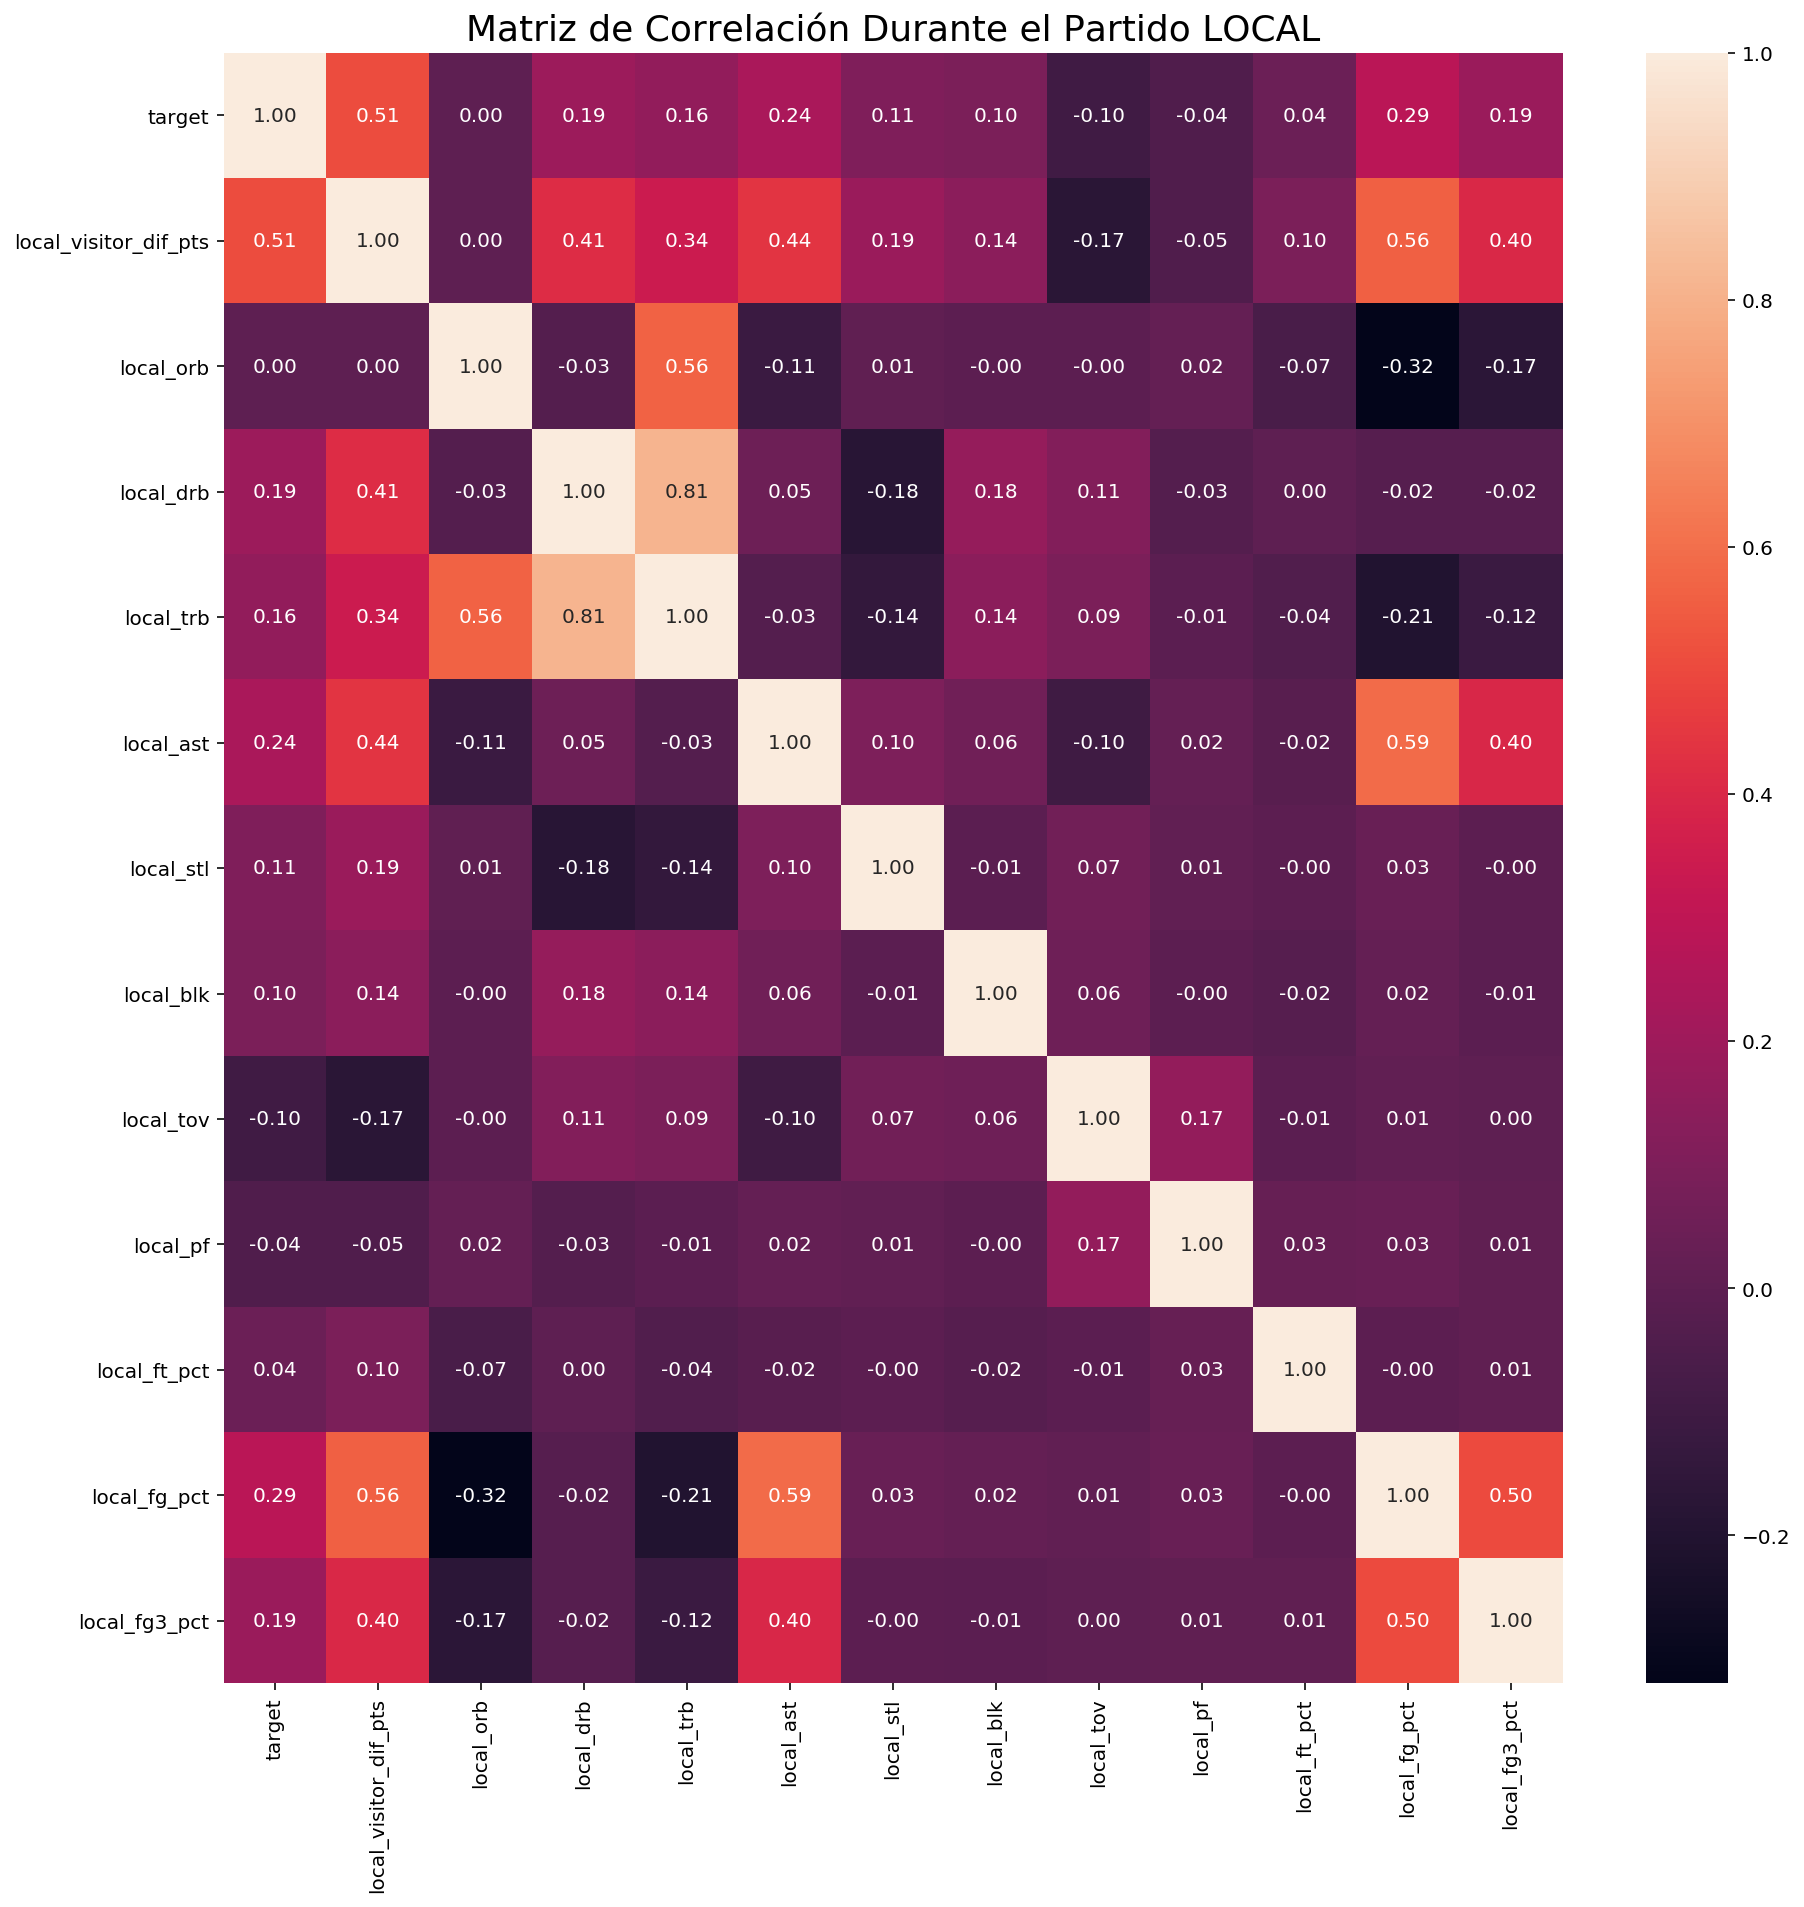

In [24]:
%matplotlib inline
# Heatmap GAME LOCAL
import seaborn as sns
plt.figure(figsize=(15, 15))
sns_3 = sns.heatmap(game_data_local.corr(), annot=True, fmt='.2f')
sns_3.set_title('Matriz de Correlación Durante el Partido LOCAL', fontsize=18)

Text(0.5, 1, 'Matriz de Correlación Durante el Partido VISITANTE')

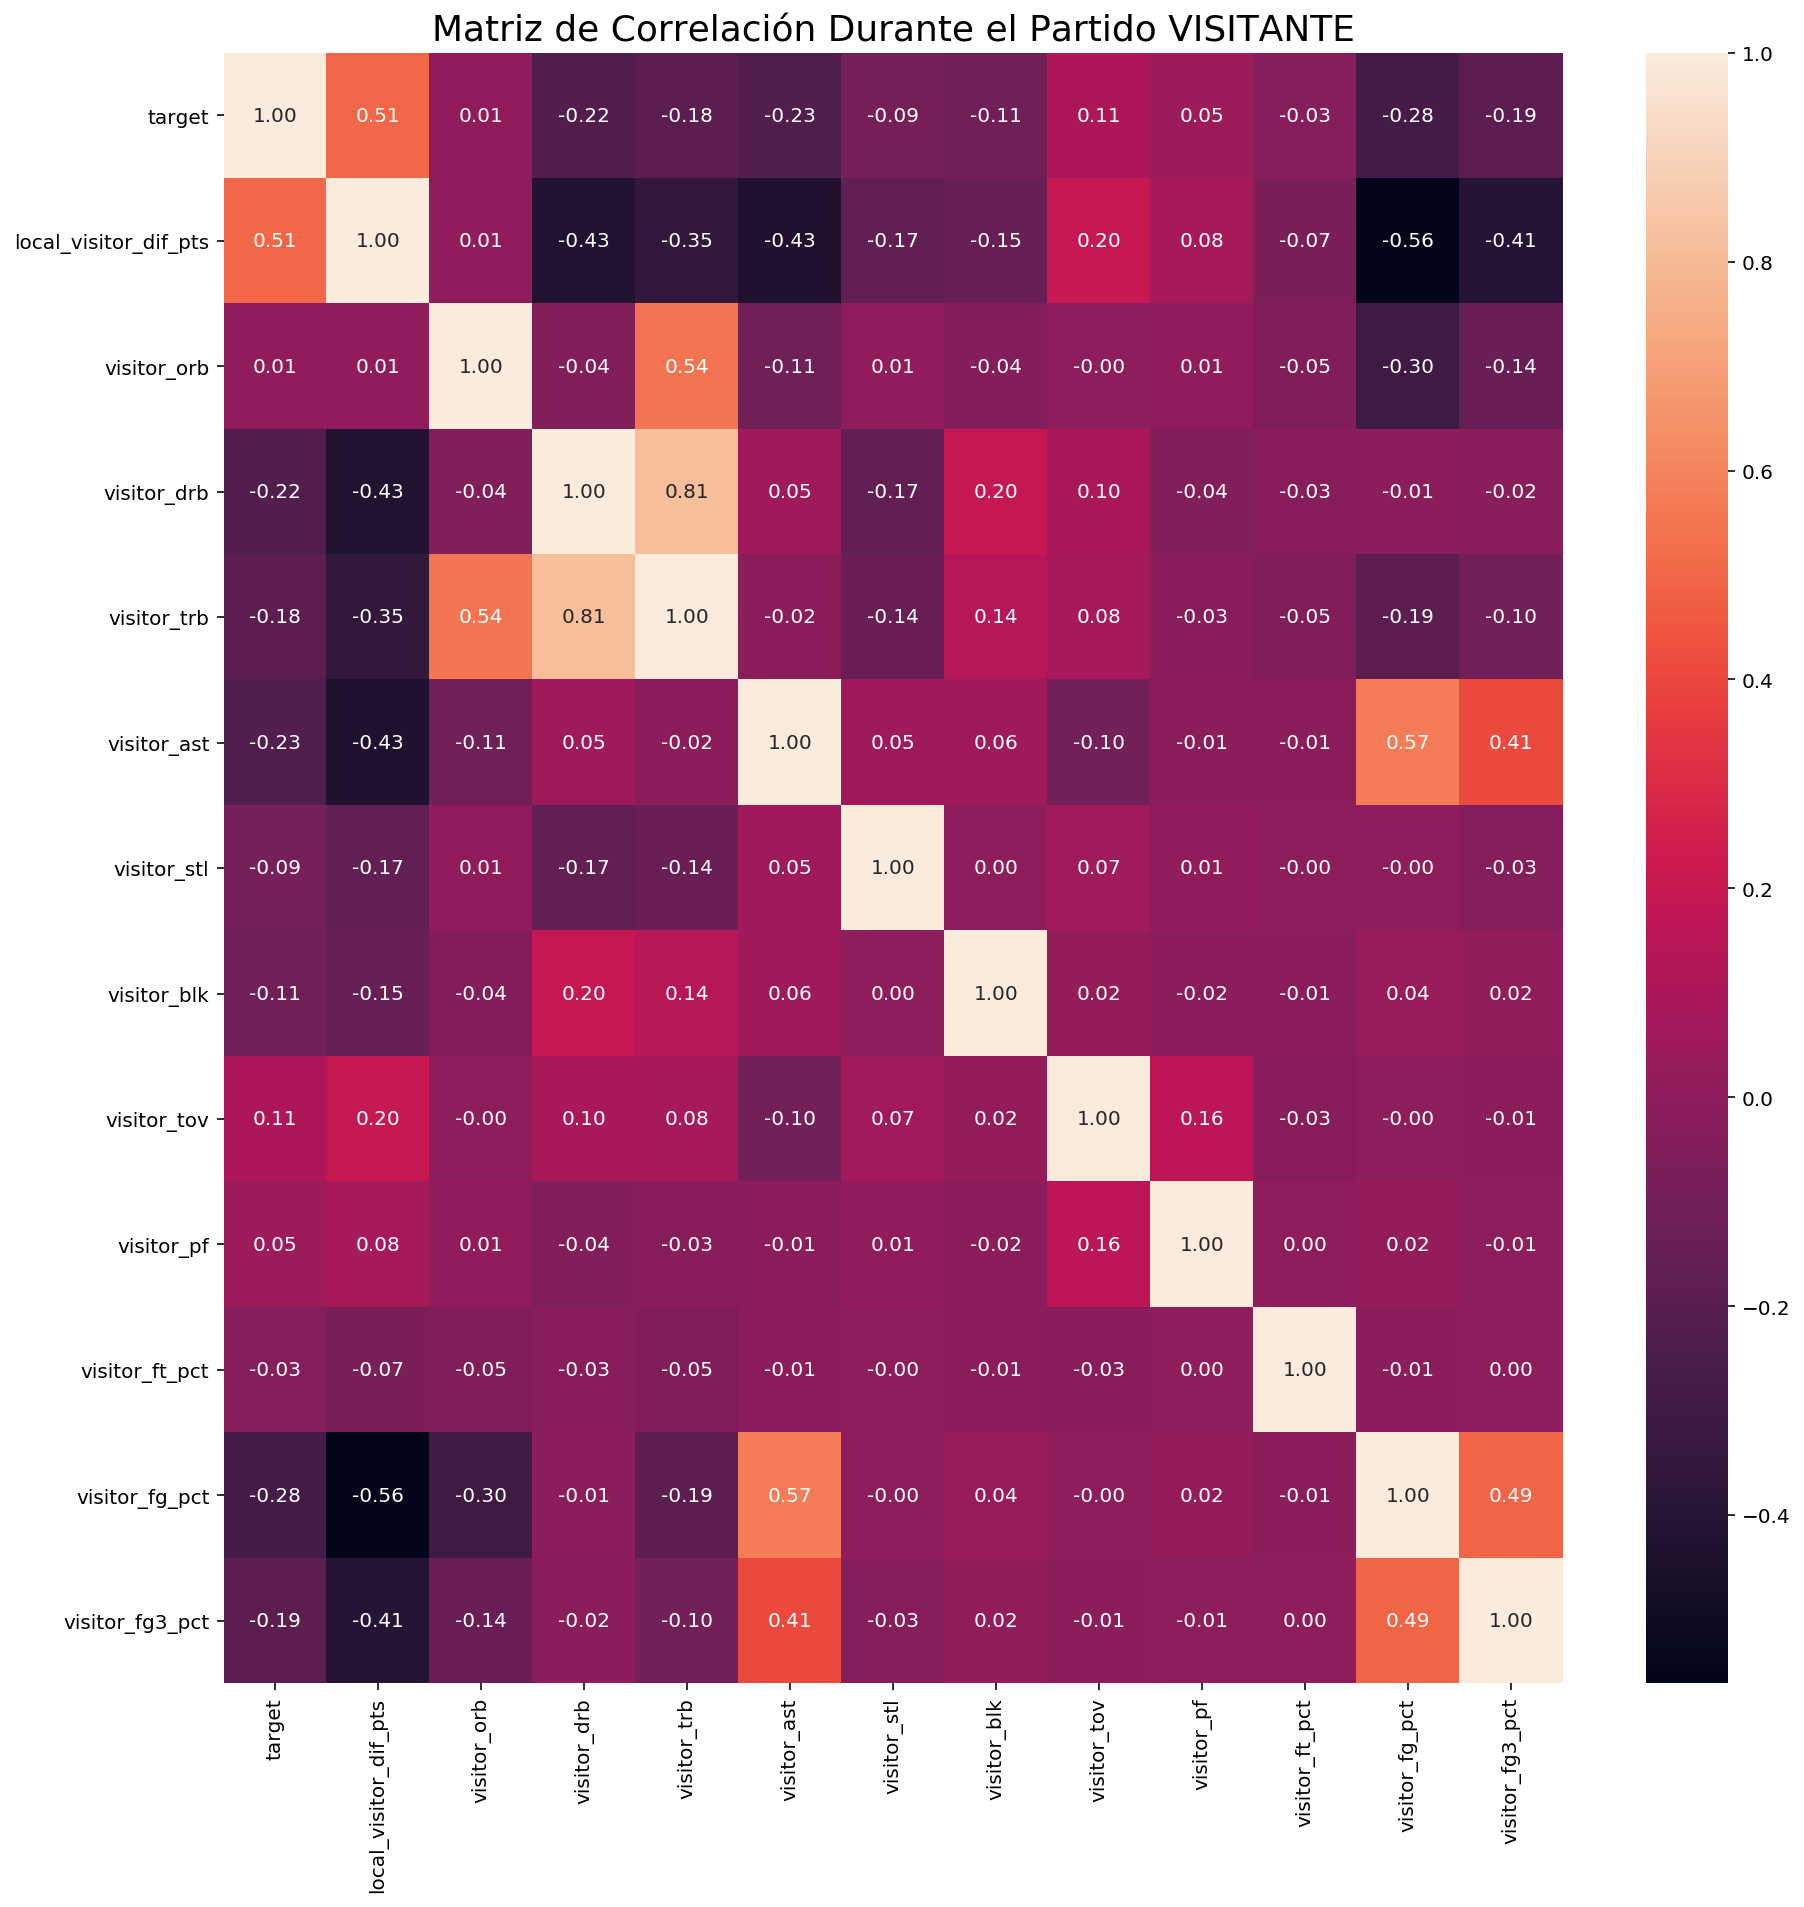

In [25]:
%matplotlib inline
# Heatmap GAME VISITANTE
import seaborn as sns
plt.figure(figsize=(15, 15))
sns_3 = sns.heatmap(game_data_visitante.corr(), annot=True, fmt='.2f')
sns_3.set_title('Matriz de Correlación Durante el Partido VISITANTE', fontsize=18)

## Selección de Variables Dummy

Usando el test de independencia de chi-cuadrado y Ganancia de la Información

**¿Incluir la totalidad de datos en la selección de variables? o ¿solo seleccionar las variables con los datos de entrenamiento?**

Puede parecer una pregunta tonta y obvia en la respuesta, pero no lo es.

Muchos expertos en el tema debaten respecto a esto, y en mi caso, sobre el último modelo que trabajé para la detección de fraude bancario, el proceso de selección se realizó con la totalidad de los datos (por recomendaciones del profesor, creo que este tipo de modelos son "especiales").

En este aspecto, y por evitar problemas de cualquier índole (por ejemplo el mayor argumento cuando se trabaja con modelos supervisados de clasificacion es tener resultados inflados en TEST), se realiza la selección solo con los datos de entrenamiento.

https://stackoverflow.com/questions/56308116/should-feature-selection-be-done-before-train-test-split-or-after

In [26]:
partidos = data[all_variables] # Dataframe de trabajo

from sklearn.model_selection import train_test_split


variables, target = partidos[dummy], partidos.iloc[:, -1:]

x_train, x_test, y_train, y_test = train_test_split(variables, target, test_size = 0.30, random_state=1)
# Cuidado con el Random_state, hay que realizar diversas pruebas para no seleccionar siempre el mismo
# conjunto de datos y se tenga un sesgo sobre las variables

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4066, 26)
(1743, 26)
(4066, 1)
(1743, 1)


local_played_prorrogue_two_days_ago
Div_local_Northwest
Div_local_Pacific
Div_local_Southeast
visitor_played_previous_date
visitor_played_two_days_ago
visitor_played_three_days_ago
visitor_played_prorrogue_three_days_ago
Conf_visitor_Este
Div_visitor_Southeast


<BarContainer object of 26 artists>

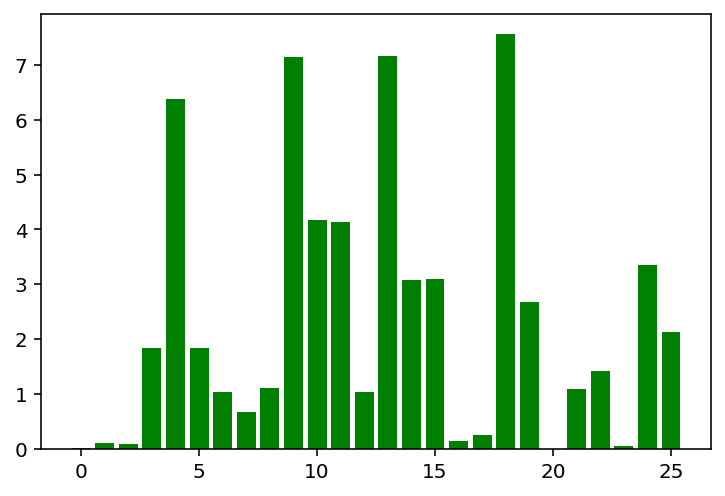

In [27]:
%matplotlib inline
from sklearn.feature_selection import SelectKBest, chi2

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x_train[dummy], y_train)
x_train_fs = fs.transform(x_train[dummy])
x_test_fs = fs.transform(x_test[dummy])

mask = fs.get_support()
chi2_variables = list(x_train[dummy].columns[mask])

chi2_var = []
for b in range(len(fs.scores_)):
    if fs.scores_[b] >= mean(fs.scores_):
        chi2_var.append(chi2_variables[b])
        print(chi2_variables[b])
        
# plot
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_, color = 'green')

local_played_three_days_ago
local_played_prorrogue_two_days_ago
local_played_prorrogue_three_days_ago
Div_local_Central
Div_local_Southwest
visitor_played_previous_date
visitor_played_prorrogue_two_days_ago
Conf_visitor_Este
Div_visitor_Central
Div_visitor_Northwest
Div_visitor_Pacific
Div_visitor_Southeast


<BarContainer object of 26 artists>

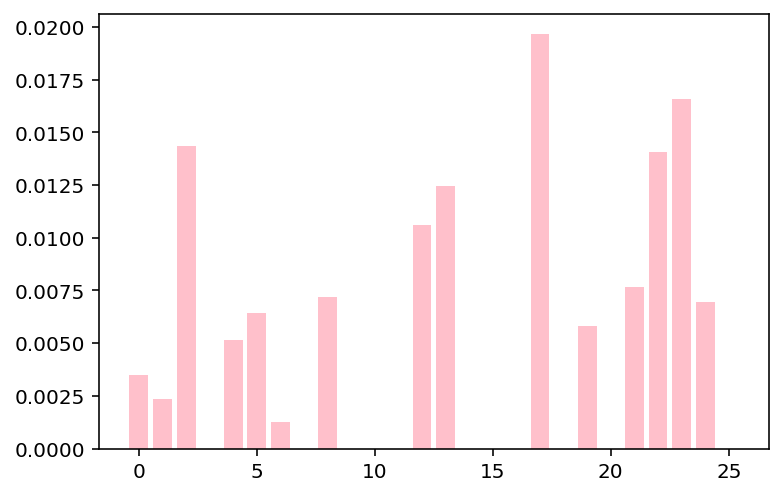

In [28]:
%matplotlib inline
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

fs = SelectKBest(score_func=mutual_info_classif, k='all', )
fs.fit(x_train[dummy], y_train)
x_train_fs = fs.transform(x_train[dummy])
x_test_fs = fs.transform(x_test[dummy])

mask = fs.get_support()
info_variables = list(x_train[dummy].columns[mask])

# Seleccionamos aquellas variables que tienen un score superior a la media (evaluar este criterio...)
info_var = []
for b in range(len(fs.scores_)):
    if fs.scores_[b] >= mean(fs.scores_):
        info_var.append(info_variables[b])
        print(info_variables[b])

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_, color = 'pink')

https://www.youtube.com/watch?v=U9h1xkNELvY

https://machinelearningmastery.com/information-gain-and-mutual-information/

https://blog.quantinsti.com/gini-index/

Este resultados me gusta más (principalmente por la lógica de las variables).

Sobre el test de independencia de chi-cuadrado me parece subjetivo los resultados, en gran parte porque el cálculo del test se basa en una matriz de confusion sobre la frecuencia de los resultados (desconociendo la probabilidad condicional de ocurrencia de target, FALTA INVESTIGAR).Creo que estos casos puede contribuir a relaciones de dependecia espúrea.

En cuanto a la Ganancia de Información Mutua, es posible que sea mas preciso en estos casos porque sus calculos son utilizados en procesos de construccion de árboles de decision.

La Información  Mutua (es lo mismo que Ganancia de la Informacion) mide la reducción de la incertidumbre para una variable dado un valor conocido de la otra variable (lo que desconoce chi-cuadrado)

## Analisis de Matriz de Correlación

### Importante:

El descarte de variables por presencia de altos grados de correlación entre variables explicativas solo tiene sentido si se va a realizar un análisis de causalidad entre las variables explicativas y la objetivo. En estos casos no será posible atribuir y distingir el nivel de importancia de una variable respecto a la variable objetivo (porque estan siendo afectadas linealmente por otras).

Cuando se comete el error de excluir variables por presencia de altos niveles de correlación entre variables explicativas en entorno de modelos de predicción, se contribuye al deterioro de la precisión del modelo, esto se debe porque las variables en conjunto complementan y comprenden mayor información que cada una de estas por separado.

Asimismo, el descarte de variables por escasez de correlación es debatible (a menos que se pretenda utilizar estimaciones lineales), depende de la relación establecida a priori entre la variable y la objetivo. El coeficiente de correlación de Pearson, por ejemplo, es una medida de la relación "lineal" entre dos variables, en este contexto, se puede decir que no necesariamente las variables tienen que estar relacionadas linealmente.

### Factor de Inflación de la Varianza (VIF)

Utilizaremos esta función para el descarte de variables perfectamente colineales.

Vamos a calcular el valor del VIF para todas las variables menos la objetivo. Para esto se realiza una regresión lineal de cada una de las variables frente al resto y aplicamos la fórmula del VIF


$$
    VIF_i = \frac{1}{1 - R_i^2}
$$

El valor del VIF se encuentra acotado ente 1 (no existe multicolinealidad) e infinito (existe una multicolinealidad perfecta). 

---------------------------------------------------------------------------------------------------------------------

Al ser una regresión simple, el coeficiente de determinacion (R-square) es simplemente el cuadrado del coeficiente de correlación de Pearson.

En este contexto, mientras más cercano a 1 mejor, porque quiere decir que menos correlación tiene una variable respecto a la otra.


Excluimos las variables que tengan VIF mayor a 5 porque son aquellas que tienen un R-square mayor a 0,8

**La salida de esta funcion es una lista de variables**

In [ ]:
from sklearn.linear_model import LinearRegression

def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0) # por las dudas
    
    for ite in range(num_features):
        x_features = features[:]
        y_feature = features[ite]
        x_features.remove(y_feature)
        
        x = data[x_features]
        y = data[y_feature]
        
        model.fit(x,y)
        
        if model.score(x,y) == 1:
            result[y_feature] = Infinity
        else:
            result[y_feature] = 1/(1 - model.score(x,y))
    
    return result


#calculateVIF(partidos.iloc[:, :-1]) # Excluimos la variale de estudio

In [ ]:
def selectDataUsingVIF(data, max_VIF):
    
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.values.max() > max_VIF:
        col_max = np.where(VIF == VIF.values.max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        print('Se ha eliminado: ----- '+ str(features[col_max]) + " ----- VIF:  " + 
              str(VIF[features[col_max]].values))
        
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

variables_vif = list(calculateVIF(selectDataUsingVIF(partidos.iloc[:, :-1], 10)).columns)
# Evaluar algún cambio en el código ya que se observa un error
# Antes de introducir la totalidad de variables, hay que hacer un descarte manual derivado del análisis 
# de las matrices de correlación

El paso anterior esta pendiente de evaluación, solo se ha dejado para tener el código listo para ejecución

# Parte II: ¿Qué Modelo elegir?

Antes de comenzar con la creación del modelo es necesario separar la muestra para el entrenamiento y test.

Para el correcto funcionamiento de las funciones creadas en esta sección es **estrictamente necesario que los datos de test y entrenamientos tengan el mismo tamaño**.

Sabemos que este no es el mejor enfoque, así como la inclusión de la totalidad de variables, pero es el más sencillo y rápido que ayudará a determinar cuales son los modelos, en su version mas sencilla, con mayor poder de predicción en entrenamiento.

Es importante destacar que no es relevante los resultados en test, este análisis busca determinar qué tipo de modelo se ajusta mejor a los datos.

In [ ]:
from sklearn.model_selection import train_test_split

var_modelo = var_continuas + info_variables # lista de variables seleccionadas

variables = partidos[var_modelo]

variables = partidos[1:] # eliminamos la primera fila (poco significativa) para tener una distribucion igualitaria

variables, target = variables.iloc[:,variables.columns != "target"], variables.iloc[:,variables.columns == "target"]

x_train, x_test, y_train, y_test = train_test_split(variables, target, test_size = 0.5, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

## Presencia de Datos Desbalanceados (¿?) Pendiente de Evaluar

### A priori esta diferencia se ha disminuido con la inclusión de más datos, hasta hora se tiene un 60-40%

https://towardsdatascience.com/what-to-do-when-your-classification-dataset-is-imbalanced-6af031b12a36


En teoria se deberia realizar una operacion de **Oversampling** ¿por que?:

Cuando el conjunto de datos no representa todas las clases de datos por igual, el modelo podría ajustarse en exceso a la clase que está más representada en su conjunto de datos (en nuestro caso como es de esperarse mayor juegos ganados por parte del local) y pasar por alto la existencia de la clase minoritaria (los juegos perdidos del local).

En este contexto, de forma exagerada, imaginemos que nuestro modelo siempre estima juego ganado para local, dado los datos, sobre la totalidad de resultados igual a 1 tendrá un accuracy aprox. igual a 60%.


In [ ]:
partidos.target.value_counts() 

## Cómo evaluar correctamente un modelo desbalanceado:

### Falta investigar

https://en.wikipedia.org/wiki/Precision_and_recall 

Hay que evaluar si se realiza el oversampling o no. De no realizarse, es importante las métricas de evaluación del modelo:

#####  colocar formula con latex

El **accuracy** puede ser una métrica engañosa para conjuntos de datos desequilibrados. Considere una muestra con 95 valores negativos y 5 positivos. La clasificación de todos los valores como negativos en este caso da un puntaje de precisión de 0.95. Hay muchas métricas que no sufren este problema. 

Por ejemplo, la precisión equilibrada (bACC) normaliza las predicciones verdaderas positivas y negativas verdaderas por el número de muestras positivas y negativas, respectivamente, y divide su suma entre dos:


##### colocar formula con latex

Para el ejemplo anterior (95 muestras negativas y 5 positivas), clasificarlas todas como negativas da un puntaje de precisión equilibrado de 0,5 (el puntaje máximo de bACC es uno), que es equivalente al valor esperado de una suposición aleatoria en un conjunto de datos equilibrado. La precisión equilibrada puede servir como una medida de rendimiento general para un modelo, ya sea que las etiquetas verdaderas estén o no desequilibradas en los datos, suponiendo que el costo de FN (falso negativo) sea el mismo que FP (falso positivo).


## Dataframe de comparación de modelos (Gini)

In [ ]:
from ipynb.fs.full.funciones_modelo import * # Previamente instalado: pip install ipynb

dict_trained_model = train_method(x_train, y_train,x_test,y_test,"LR") #solo un ejemplo
method_list = ['LR','LASSO','LOGR','RIDGE', 'DT','RFR','RFC','GBR'] 
df_result_summary = pd.DataFrame(index=method_list,columns=['GINI-train','GINI-test', 'Caída %'])
C1 = []
C2 = []
C3 = []
for method in method_list:
    dict_trained_model[method] = train_method(x_train, y_train,x_test,y_test,method)
    # Predicciones - REGRESIONES
    if method in ['LR','LASSO','RIDGE','RFR','GBR']: 
        y_pred_train = dict_trained_model[method]['model'].predict(x_train)
        y_pred_test = dict_trained_model[method]['model'].predict(x_test)
    else: # Predicciones - CLASIFICADORES
        y_pred_train = dict_trained_model[method]['model'].predict_proba(x_train)[:,1]
        y_pred_test = dict_trained_model[method]['model'].predict_proba(x_test)[:,1]
    # Calculo de GINI
    gini_score_train = GS(y_train,y_pred_train)
    C1.append(gini_score_train)
    gini_score_test = GS(y_test,y_pred_test)
    C2.append(gini_score_test)
    diferencia = (1-(gini_score_test/gini_score_train)) * 100
    C3.append(diferencia)
    
# Append al dataframe
df_result_summary ['GINI-train'] = C1
df_result_summary ['GINI-test'] = C2
df_result_summary ['Caída %'] = C3

# Print
df_result_summary.sort_values('GINI-train', ascending=False)

## Dataframe de comparación de modelos (Accuracy)

#### Accuracy (exactitud)
La exactitud es una métrica para evaluar modelos de resultados de clasificación. 

Informalmente, la exactitud es la fracción de predicciones que el modelo realizó correctamente.

Formalmente, la exactitud tiene la siguiente definición:

$A = \frac{VP + VN}{VP + FP + VN + FN}$

Donde: **VP** = Verdaderos positivos, **VN** = Verdaderos negativos, **FP** = Falsos positivos y **FN** = Falsos negativos

In [ ]:
from ipynb.fs.full.funciones_modelo import *

data = []
for method in method_list:
    dict_trained_model[method] = train_method(x_train, y_train,x_test,y_test,method)
#    print (dict_trained_model[method])
    data.append([method, dict_trained_model[method]['accuracy_train'], dict_trained_model[method]['accuracy_test']])

df_result_summary_2 = pd.DataFrame(data,columns=['method','accuracy_train','accuracy_test']) 
                
df_result_summary_2.sort_values('accuracy_train', ascending = False)

## ¿Qué modelo elegir?

#### me falta adornar la justificacion, pendiente de leer un poco de teoría

Este punto es muy importante en el proceso, es lo que determina nuestra elección por el tipo de modelo que vamos a desarrollar.

Se comparan los distintos modelos basados en árboles de decisión y en estimaciones lineales.

Se observa que el modelo basado en árbol de decisión que mejor se ajusta a los datos de entrenamiento es el Random Forest Classifier.

## División en Entrenamiento y Test 

In [29]:
from sklearn.model_selection import train_test_split

var_modelo = var_continuas + info_variables # lista de variables seleccionadas

variables = partidos[var_modelo]

variables, target = variables.iloc[:,variables.columns != "target"], variables.iloc[:,variables.columns == "target"]

x_train, x_test, y_train, y_test = train_test_split(variables, target, test_size = 0.30, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4066, 76)
(1743, 76)
(4066, 1)
(1743, 1)


# Random Forest Classifier

## Selección de Variables con RF

In [30]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


list_var = list(set(x_train.columns)) # Variables de entrenamiento

       
forest = RandomForestClassifier()

forest.fit(x_train, y_train) # Dilema: ¿seleccionamos todos los datos o solo entrenamiento? Entrenamiento

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

# Ranking de todas las variables...
#for f in range(len(variables.columns)):
#    print("%d. %s (%f) " % (f + 1, list_var[indices[f]], importances[indices[f]]))

rf_variables = []
for f in range(60): # eleccion arbitraria, esto luego se va probando hasta determinar el optimo...
    rf_variables.append(list_var[indices[f]])
rf_variables

['local_ft_pct',
 'local_played_prorrogue_two_days_ago',
 'local_Percentagewl',
 'local_Dif_leader',
 'local_played_three_days_ago',
 'visitor_ast',
 'visitor_played_prorrogue_two_days_ago',
 'Div_visitor_Southeast',
 'visitor_trb',
 'distance_between_stadiums',
 'Div_local_Northwest',
 'local_played_prorrogue_three_days_ago',
 'visitor_Conf_position',
 'local_fg3_pct',
 'local_blk',
 'avg_distance_place_visitor_played',
 'LOCAL_Racha',
 'local_played_two_days_ago',
 'local_Conf_position',
 'visitor_dif_between_previous_game',
 'local_played_prorrogue_previous_date',
 'Div_visitor_Pacific',
 'distance_local_traveled',
 'visitor_played_previous_date',
 'visitor_stl',
 'visitor_tov',
 'local_drb',
 'VISITOR_AWS_MEDIO_AGRUPADO',
 'Conf_visitor_Este',
 'local_played_visitor',
 'visitor_blk',
 'visitor_ft_pct',
 'visitor_fg3_pct',
 'LOCAL_porcentaje_victoria_Ultimos10',
 'visitor_Dif_leader',
 'visitor_played_two_days_ago',
 'VISITANTE_porcentaje_victoria_VISITANTE',
 'local_orb',
 'Div_loc

## Selección de Variables con Algoritmo Genético (GA)

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import re
from deap import creator, base, tools, algorithms # LIBRERIA DE ALGORITMO GENÉTICO - instalar (Anaconda): pip install deap
import random
from sklearn import metrics

list_inputs = set(x_train.columns) # colocar la lista de variables de entrenamiento


# CONFIGURACIÓN DEL ALGORITMO GENÉTICO. 
# STARTING POOL (STARTING CANDIDATE POPULATION)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(list_inputs))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
def evalOneMax(individual):
    return sum(individual),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

NPOPSIZE = len(x_train.columns) #RANDOM STARTING POOL SIZE
population = toolbox.population(n=NPOPSIZE)

In [ ]:
from sklearn.metrics import roc_auc_score
#####
# EVALUACIÓN DE GINI PARA EL NPOPSIZE CREADO
#####
dic_gini={}

for i in range(np.shape(population)[0]): 

    # LISTA DE VARIABLES
    var_model = []    
    for j in range(np.shape(population)[0]): 
        if (population[i])[j]==1:
            var_model.append(list(list_inputs)[j])

    # EVALUACIÓN DEL INDICE DE GINI PARA CADA VARIABLE EN LA STARTING POOL 
    
    X_train = x_train.copy() # copiamos para no modificar los datos
    Y_train = y_train.copy()

    ######
    # EVALUACIÓN DEL MODELO PARA EL CALCULO DEL ALGORITMO GENÉTICO
    #####      

    RFC = RandomForestClassifier()
    model = RFC.fit(X_train, Y_train)
    Y_predict = model.predict_proba(X_train)[:,1]
            
    ######
    # INICIO: DESARROLLO DE LA MÉTRICA DE EVALUACIÓN DEL MODELO PARA SELECCIONAR VARIABLES (GINI)
    ######
    fpr, tpr, thresholds = metrics.roc_curve(Y_train, Y_predict) # Es posible cambiar la métrica en este punto
    auc = metrics.auc(fpr, tpr)
    
    gini_power= 2*roc_auc_score(Y_train, Y_predict)-1
    
    #gini_power = abs(2*auc-1)
    ######
    # FINAL: DESARROLLO DE LA MÉTRICA DE EVALUACIÓN DEL MODELO PARA SELECCIONAR VARIABLES (GINI)
    #####                
    
    gini=str(gini_power)+";"+str(population[j]).replace('[','').replace(', ','').replace(']','')
    dic_gini[gini]=population[j] 
    
list_gini = sorted(dic_gini.keys(),reverse=True)

In [ ]:
#####
# INICIO: LOOP DEL ALGORITMO GENÉTICO
####
# Se itera las veces que sea necesario hasta que no mejore la métrica de evaluación del modelo
# de esta forma es posible encontrar el óptimo de variables para conseguir el máximo gini posible.
#####
sum_current_gini = 0.0
sum_current_gini_1 = 0.0
sum_current_gini_2 = 0.0
first = 0    
OK = 1
a = 0
while OK:  # Se repite hasta que no mejore el modelo, al menos un poco. Para GINI en 2 generaciones
    a = a + 1
    print('loop ', a)
    OK=0

    ####
    # INICIO: OFFSPRING
    ####
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1) #CROSS-X PROBABILITY = 50%, MUTATION PROBABILITY=10%
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population =toolbox.select(offspring, k=len(population))
    ####
    # FINAL: OFFSPRING
    ####

    sum_current_gini_2 = sum_current_gini_1
    sum_current_gini_1 = sum_current_gini
    sum_current_gini = 0.0

    #####
    #INICIO: EVALUACION DE GINI EN EL OFFSPRING (DESCENDENCIA)
    #####
    for j in range(np.shape(population)[0]): 
        if population[j] not in dic_gini.values(): 
            var_model = [] 
            for i in range(np.shape(population)[0]): 
                if (population[j])[i]==1:
                    var_model.append(list(list_inputs)[i])
            
            X_train= x_train.copy()
            Y_train= y_train.copy()
            
            ######
            # EVALUACIÓN DEL OFFSPRING (DESCENDENCIA) INICIAL
            #####    
    
            
            RFC = RandomForestClassifier()
            model = RFC.fit(X_train, Y_train)
            Y_predict = model.predict_proba(X_train)[:,1]                      
            
            ######
            # INICIO: DESARROLLO DE LA MÉTRICA DE EVALUACIÓN DEL MODELO PARA SELECCIONAR VARIABLES (GINI)
            #####                       
            fpr, tpr, thresholds = metrics.roc_curve(Y_train, Y_predict)
            auc = metrics.auc(fpr, tpr)
            gini_power= 2*roc_auc_score(Y_train, Y_predict)-1   
            
            #gini_power = abs(2*auc-1)
            ######
            # FINAL: DESARROLLO DE LA MÉTRICA DE EVALUACIÓN DEL MODELO PARA SELECCIONAR VARIABLES (GINI)
            #####                       
           
            gini=str(gini_power)+";"+str(population[j]).replace('[','').replace(', ','').replace(']','')
            dic_gini[gini]=population[j]  
    #####
    # FINAL: EVALUACION DE GINI EN EL OFFSPRING (DESCENDENCIA)
    #####

    #####
    # INICIO: SELECCIÓN DE LAS MEJORES VARIABLES
    #####           
    list_gini=sorted(dic_gini.keys(),reverse=True)
    population=[]
    for i in list_gini[:NPOPSIZE]:
        population.append(dic_gini[i])
        gini=float(i.split(';')[0])
        sum_current_gini+=gini
    #####
    # FINAL: SELECCIÓN DE LAS MEJORES VARIABLES
    #####           
      
    # MEJORA DEL GINI EN LAS ÚLTIMAS DOS GENERACIONES
    print ('sum_current_gini=', sum_current_gini)
    if(sum_current_gini>sum_current_gini_1+0.0001 or sum_current_gini>sum_current_gini_2+0.0001):
        OK=1
#####
# FINAL: LOOP DEL ALGORITMO GENÉTICO
#####


gini_max=list_gini[0]        
gini=float(gini_max.split(';')[0])
features=gini_max.split(';')[1]


####
# LISTA DE VARIABLES SELECCIONADAS
#####
adn_variables = []
f=0
for i in range(len(features)):
    if features[i]=='1':
        f+=1
        adn_variables.append(list(list_inputs)[i])
        print ('feature ', f, ':', list(list_inputs)[i])
print ('gini: ', gini)

## Hiperparametrización

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def Grid_Search_CV_RFR(X_train, y_train):


    estimator = RandomForestClassifier()
    param_grid = {
        "n_estimators": [500, 1000, 1250, 1500],
        "max_features": ["auto", "sqrt", "log2"],
        "min_samples_split": [2,4,8,16],
        "bootstrap": [True, False],
        "criterion": ['gini', 'entropy'] # se necesitan diversas pruebas, se que default es gini, probar entropy
    }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5) # cambiar CV, depende del tamaño de los datos

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFC(X_train, X_test, y_train, y_test, best_params):

    estimator = RandomForestClassifier(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("GINI:",GS(y_test,y_predict))
    return y_test,y_predict

In [ ]:
#### ESTE CÓDIGO LLEVA MUCHO TIEMPO DE EJECUCIÓN

for i in range(2):
    print ("Loop: " , i)
    print ("--------------")
    # Es importante dividir el set de datos en partes iguales 50% train y 50% test solo para evaluar
    
    best_score, best_params = Grid_Search_CV_RFR(x_train, y_train)
    y_test , y_predict = RFC(x_train, x_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Resultados del loop anterior, para no volver a ejecutar que consume mucho tiempo:
    

Loop:  0
--------------
GINI: 0.4780002348265111
Best Score: 0.7402501839587933
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
Loop:  1
--------------
GINI: 0.49720817370203996
Best Score: 0.739514348785872
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 100}
Loop:  2
--------------
GINI: 0.4908352431106684
Best Score: 0.7402501839587933
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Loop:  3
--------------
GINI: 0.49748431228447054
Best Score: 0.739514348785872
Best params: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 500}
Loop:  4
--------------
GINI: 0.5102279991476666
Best Score: 0.7387785136129507
Best params: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 500}



GINI: 1.0
Best Score: 1.0
Best params: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 500}
Loop:  4
--------------

# Parte III: Evaluación del modelo


### Modelos a evaluar:

###### Random Forest Classifier
###### Logistic Regression


## Usando Validación Cruzada

Una desventaja de usar un conjunto de datos de test y otro de entrenamiento para la validación del modelo es que hemos perdido una parte importante de nuestros datos (entre el 20% y 30%) en la evaluación del modelo. Esto no es óptimo desde muchos puntos de vista, principalmente por **uso inadecuado de los recursos escasos (datos)**.

¿Pocos datos? Si, para el caso de la NBA es que existen muchos años de datos, sin embargo, a priori se tienen hipótesis de cambios estructurales (forma del juego) que de alguna forma el modelo no podrá diferenciar y es posible que no tenga la capacidad de generalizar sobre datos no observados.

En este contexto, lo mejor que podemos hacer es aprovechar al máximo los datos que tenemos. Para resolver este problema utilizaremos la validación cruzada.

--------------------------------------------------------------------------------------------------------------------

**NOTA:** como parte del proyecto será importante plantear la hipótesis sobre el posible cambio estructural de los datos dado el cambio de juego (posiblemente un juego mas rapido, mas tiros de triples, mas puntos anotados, etc).

Esta hipótesis sobre la generealizacion del modelo se puede abordar realizando un modelo con menos datos y otro con mas datos para posteriormente comparar.

Usamos la función `cross_val_score`. Esta función divide el conjunto de datos en diferentes muestras y entrena con todas menos una, dejando la restante para validación. Este proceso se repite según el número en el que se divida las muestras para la validación.

Otro problema de utilizar esta técnica es saber **cuál es el número óptimo** de divisiones de la muestra.

Estas divisiones de muestra se llaman **folds** determinada por la letra **"k"**. Dentro de los parámetros de `cross_val_score` se usan dos métodos para la division de la muestra,  KFold y StratifiedKFold.

Por ahora utilizaremos como base el enfoque más común en problemas de Machine Learning determinando k= 10 (si los datos lo permiten, sino por defecto k=5).


Mediante `cv` se indica el numero de partes en las que se dividen los datos. La función devuelve un vector con el score de cada uno de los modelos construidos.

https://machinelearningmastery.com/k-fold-cross-validation/

In [31]:
# MUY IMPORTANTE!!!! https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
from ipynb.fs.full.funciones_modelo import *
from sklearn.model_selection import cross_val_score

model_list = {'RFC': RandomForestClassifier(),
              'LR': LogisticRegression()}


variable_final = rf_variables.copy() # Lista de variables seleccionadas para el modelo

x_TRAIN = x_train[variable_final]

x_TEST = x_test[variable_final]


# Iteracion entre modelos para comparación

dataframe = pd.DataFrame(index=model_list ,columns=['Accuracy_train',
                                                    'Desv. Típica Accuracy_train',
                                                    'Accuracy_test',
                                                    'Desv. Típica Accuracy_test'])
C1 = []
C2 = []
C3 = []
C4 = []

for method in model_list:
    scores_train = cross_val_score(model_list[method], x_TRAIN, y_train, cv = 5, 
                                   scoring='accuracy') #cv variacion cruzada 5 modelos
    scores_test = cross_val_score(model_list[method], x_TEST, y_test, cv = 5, scoring='accuracy')
    C1.append(np.mean(scores_train))
    C2.append(np.std(scores_train))
    C3.append(np.mean(scores_test))
    C4.append(np.std(scores_test))

# Append al dataframe
dataframe['Accuracy_train'] = C1
dataframe['Desv. Típica Accuracy_train'] = C2
dataframe['Accuracy_test'] = C3
dataframe[ 'Desv. Típica Accuracy_test'] = C4

print("COMPARACION ACCURACY CON VALIDACION CRUZADA K=5")

dataframe.sort_values('Accuracy_test', ascending=False)

COMPARACION ACCURACY CON VALIDACION CRUZADA K=5


,Accuracy_train,Desv. Típica Accuracy_train,Accuracy_test,Desv. Típica Accuracy_test
RFC,0.780621,0.010101,0.759615,0.004283
LR,0.613377,0.012651,0.588055,0.011970


In [33]:
from sklearn.metrics import accuracy_score

dataframe_resultados = pd.DataFrame(index=model_list ,columns=['Accuracy_test','Accuracy_train'])

dataframe_pred_test = pd.DataFrame() # Dataframe de predicciones test
dataframe_pred_train = pd.DataFrame() # Dataframe de predicciones train


C1 = []
C2 = []

for method in model_list:
    
    # Modelo
    
    modelo_final = model_list[method].fit(x_TRAIN, y_train) 
    
    #Fitting test   
    
    y_pred_test = modelo_final.predict(x_TEST) #Vector de resultados (1 y 0)
    y_prob_pred_test = modelo_final.predict_proba(x_TEST)[:,1] # Probabilidad del resultado = 1
    
    score_test = accuracy_score(y_test, y_pred_test)
    
    #Fitting train  
    
    y_pred_train = modelo_final.predict(x_TRAIN) #Vector de resultados (1 y 0)
    y_prob_pred_train = modelo_final.predict_proba(x_TRAIN)[:,1] #Probabilidad del resultado = 1 
    
    score_train = accuracy_score(y_train, y_pred_train)
    
    
    # Append al dataframe de predicciones
    
    dataframe_pred_test['y_pred_test'+'_'+str(method)] = y_pred_test
    dataframe_pred_train['y_pred_train'+'_'+str(method)] = y_pred_train
    
    # Append al dataframe de resultados

    C1.append(score_test)
    C2.append(score_train)
    


# Append al dataframe de resultados
dataframe_resultados['Accuracy_test'] = C1
dataframe_resultados['Accuracy_train'] = C2



print("COMPARACION ACCURACY FINAL")

dataframe_resultados.sort_values('Accuracy_test', ascending = False)

COMPARACION ACCURACY FINAL


,Accuracy_test,Accuracy_train
RFC,0.773379,1.000000
LR,0.585772,0.612641


### NOTA: 

Si existe un mal desempeño del modelo en el resultado anterior, se debe evaluar métodos que limiten la caida del accuracy o cualquier otra métrica de evaluación en los datos de test

import pickle
# CÓDIGO PARA GUARDAR MODELO Y LISTA DE VARIABLES

#Mejor modelo: 11/05/2020 11:58 pm

#RandomForestClassifier(n_estimators=500, max_features='auto', min_samples_split=16, bootstrap=True)
    
# EXPORTAR MODELO

filename = 'nba_pred_model_RFC_best.sav'
pickle.dump(model_list["RFC"], open(filename, 'wb'))


# EXPORTAR LISTA DE VARIABLES

with open('best_rf_variables.txt', 'w') as f:
    for item in rf_variables:
        f.write("%s\n" %item)

# IMPORTAR LISTA DE VARIABLES

#with open('best_rf_variables.txt', 'r') as f:
#    best_rf_variables = f.read().splitlines()



from sklearn.externals import joblib
joblib.dump(clf, 'filename.pkl')
model = joblib.load('filename.pkl')

## Métricas de rendimiento para modelos de clasificación binarios
En los problemas de clasificación de clase binarios, en la que los resultados se etiquetan positivos (P) o negativos (N), hay cuatro posibles resultados que se pueden obtener:
* Verdaderos Positivos (TP)
* Verdaderos Negativos (TN)
* Falsos Positivos (FP) o Error tipo I
* Falsos Negativos (FN) o Error de tipo II

Para facilitar el análisis, los resultados se pueden organizar en una matriz de confusión:

$$
\left|
\begin{array}{cc}
TP & FP \\
FN & TN \\
\end{array}
\right|
$$

A partir de estos resultados se pueden construir diferentes métricas para evaluar la calidad de los modelos construidos, algunas de las más utilizadas son:
* Precisión (Accuracy): $A = \frac{TP + TN}{TP + FP + TN + FN}$
* Exactitud (Precision): $P = \frac{TP}{TP + FP}$
* Exhaustividad (Recall): $R = \frac{TP}{TP + FN}$
* Área bajo la curva ROC (ROC AUC)

En *scikit-learn* todas estas métricas se encuentran en la librería `metrics`. Se pueden probar en un conjunto de datos conocido.

MÉTRICAS DE ENTRENAMIENTO RANDOM FOREST CLASSIFIER
La matriz de confusión es 
[[1681    0]
 [   0 2385]]
Precisión (Accuracy): 1.0
Exactitud (Precision): 1.0
Exhaustividad (Recall): 1.0
AUC: 1.0


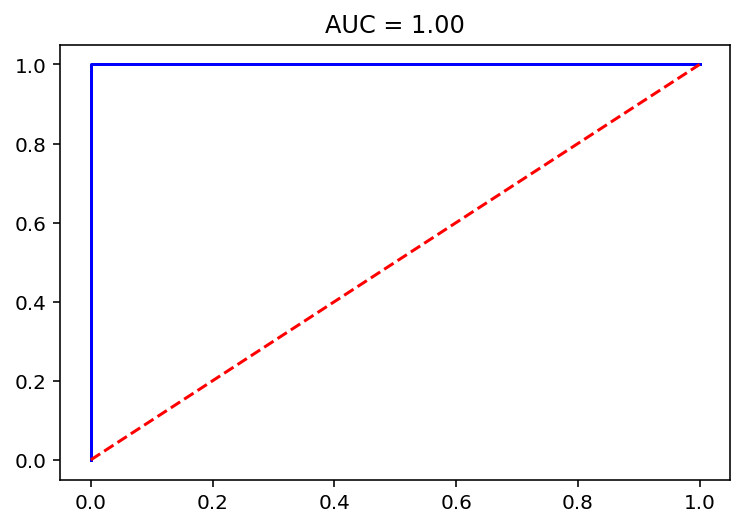

In [34]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def metricas(y_true, y_pred):
    print(u'La matriz de confusión es ')
    print(confusion_matrix(y_true, y_pred))

    print(u'Precisión (Accuracy):', accuracy_score(y_true, y_pred))
    print(u'Exactitud (Precision):', precision_score(y_true, y_pred))
    print(u'Exhaustividad (Recall):', recall_score(y_true, y_pred))

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print(u'AUC:', roc_auc)

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title(u'AUC = %0.2f' % roc_auc)
    
print('MÉTRICAS DE ENTRENAMIENTO RANDOM FOREST CLASSIFIER')    
metricas(y_train, dataframe_pred_train['y_pred_train_RFC'])

MÉTRICAS DE TEST RANDOM FOREST CLASSIFIER
La matriz de confusión es 
[[492 247]
 [148 856]]
Precisión (Accuracy): 0.7733792312105565
Exactitud (Precision): 0.7760652765185857
Exhaustividad (Recall): 0.852589641434263
AUC: 0.7591770940594861


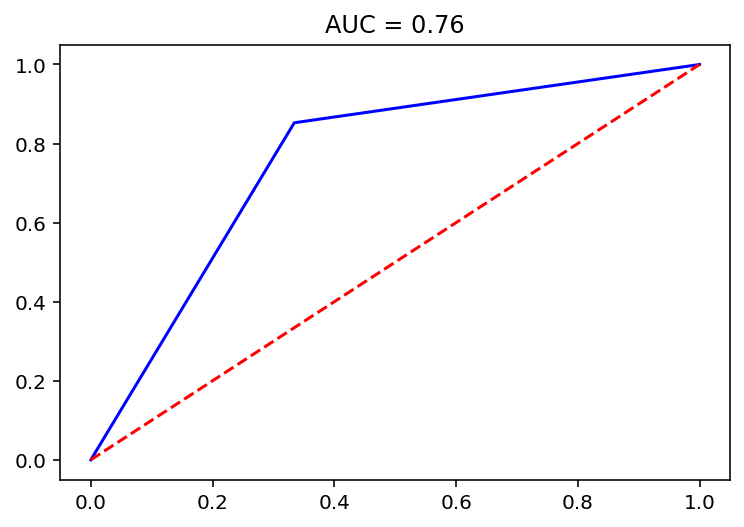

In [35]:
%matplotlib inline
print('MÉTRICAS DE TEST RANDOM FOREST CLASSIFIER')  
metricas(y_test, dataframe_pred_test['y_pred_test_RFC'])